# Evaluate End-Of-Day Options Data (OptionMetrics via WRDS)

In [1]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
import torch

from volatility_smoothing.utils.options_data import WRDSOptionsDataset
from volatility_smoothing.utils.train.loss import Loss
from volatility_smoothing.utils.train.dataset import GNOOptionsDataset
from volatility_smoothing.utils.train import misc


## Create Dataset Class and Load

In [2]:
os.environ['OPDS_CACHE_DIR'] = os.path.expanduser('~/.cache/opds')
os.environ['OPDS_WRDS_DATA_DIR'] = os.path.abspath("../data/wrds/spx")  # <- .csv file from WRDS should be place inside this directory

spx_dataset = WRDSOptionsDataset()
spx_gno_dataset = GNOOptionsDataset(spx_dataset, subsample=False)

## Model and Optimizer

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
path = "../train/store/9448705/checkpoints/checkpoint_final.pt"
gno, _ = misc.load_checkpoint(path, device=device)

## Evaluation

### Configure evaluation loss

In [6]:
step_r = 0.05
step_z = 0.01
loss = Loss(step_r=step_r, step_z=step_z)

### Evaluate Dataset

In [7]:
df_val, df_rel, df_fit = loss.evaluate(gno, spx_gno_dataset, device=device)

### Plots

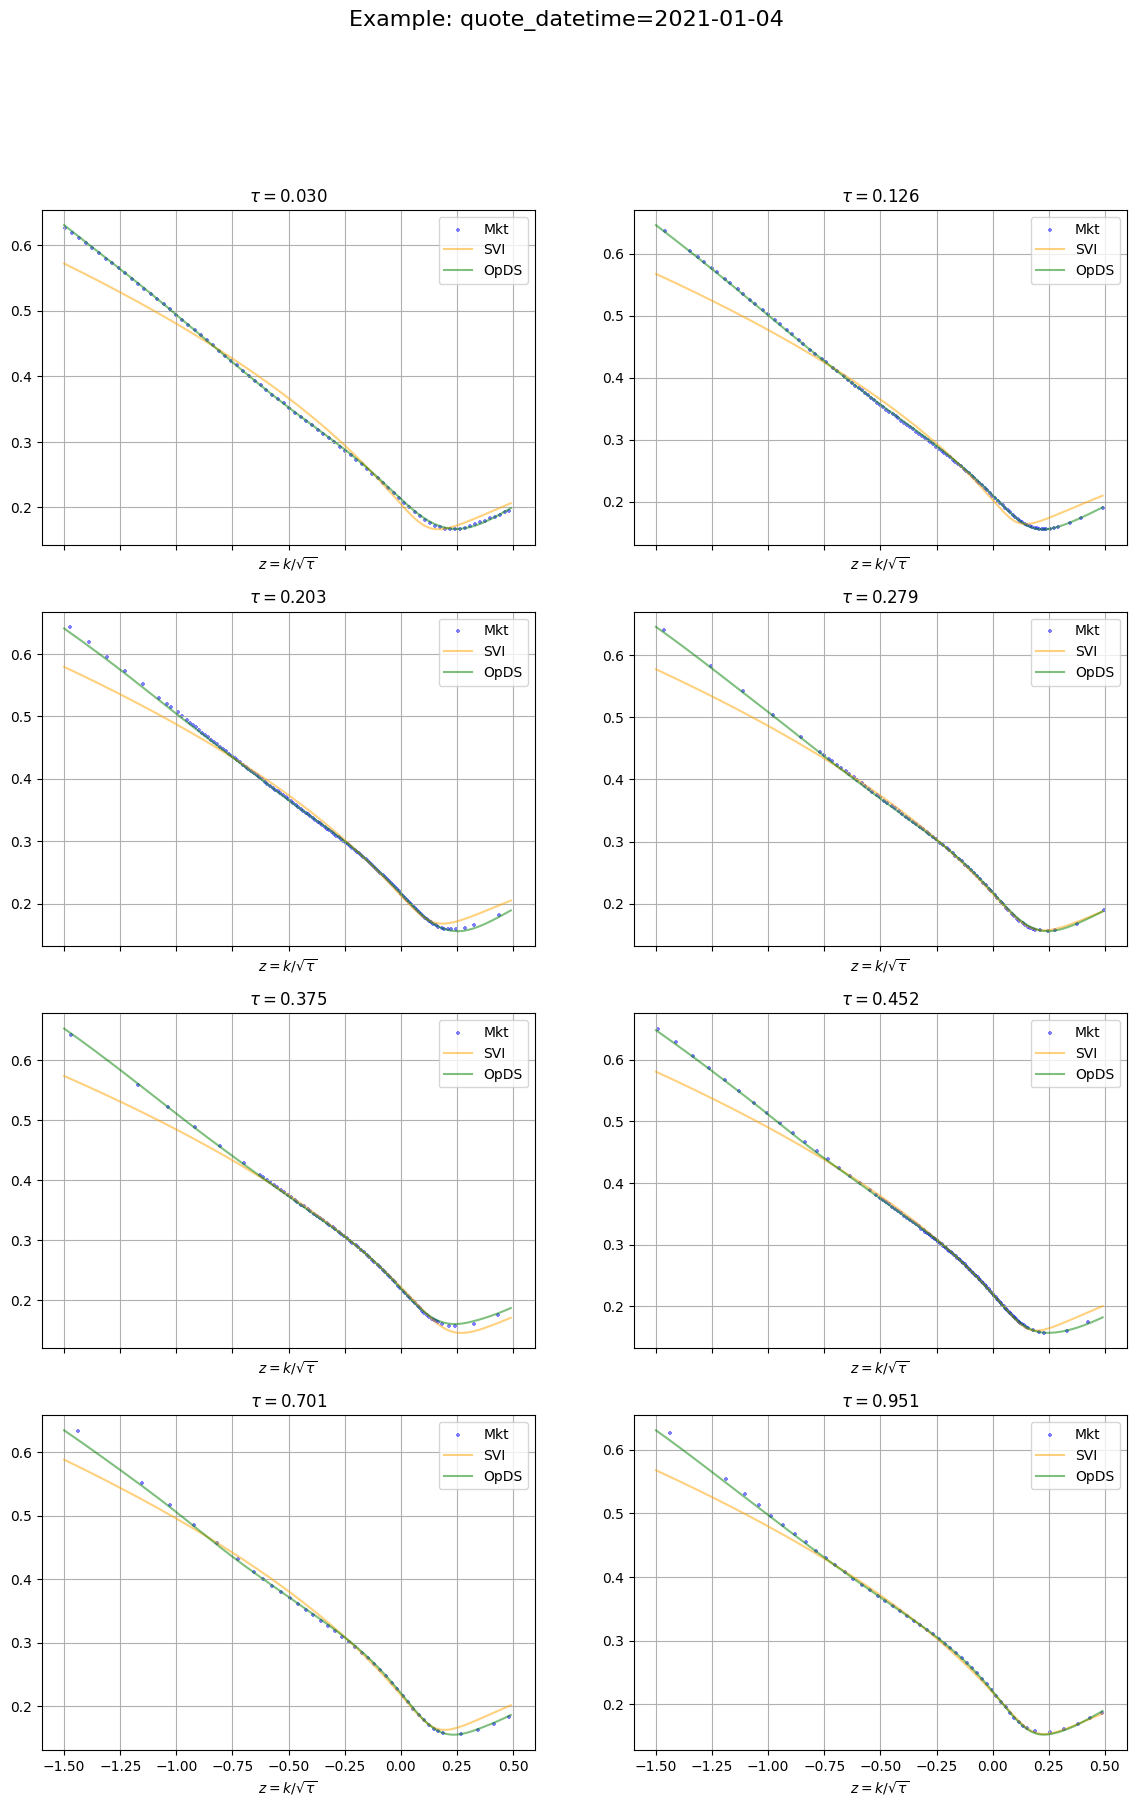

/Users/ruben/repos/operator-deep-smoothing-for-implied-volatility/volatility_smoothing/utils/svi.py:41: RuntimeWarning: invalid value encountered in sqrt
  return w ** .5


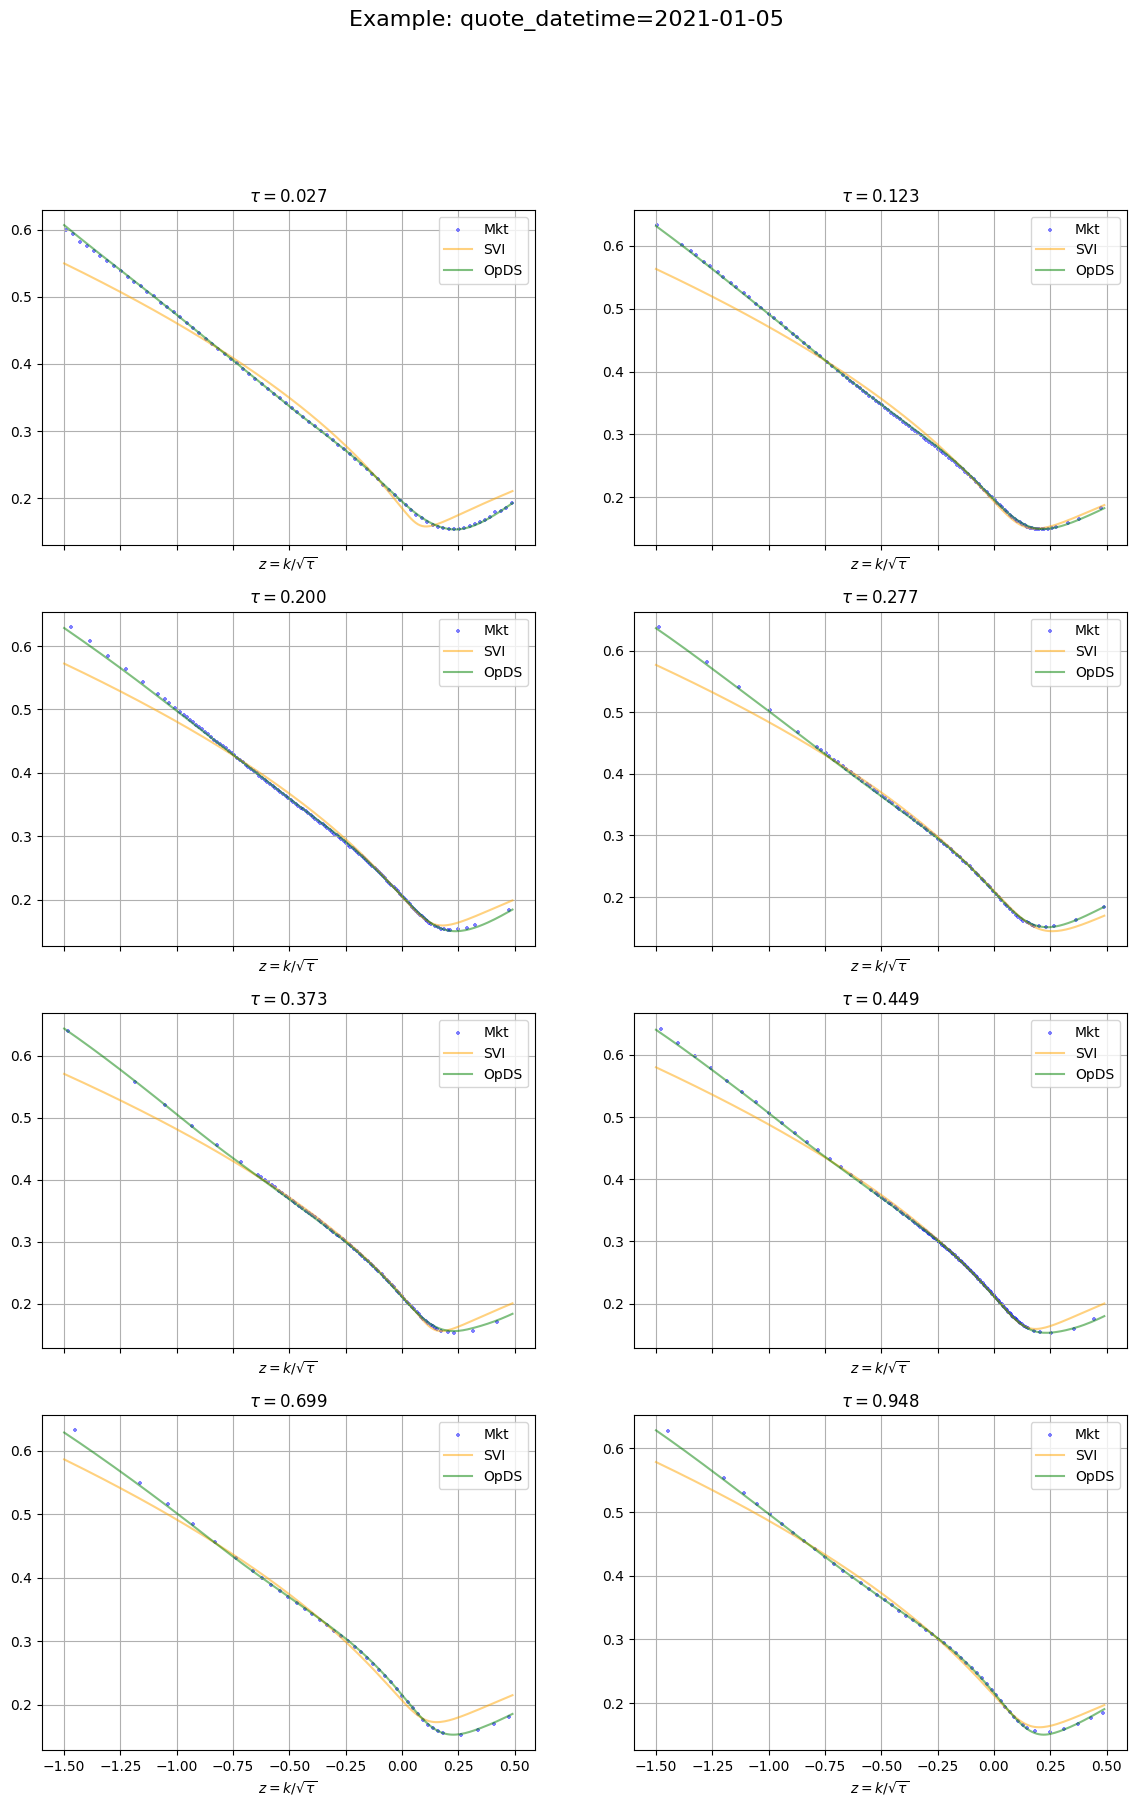

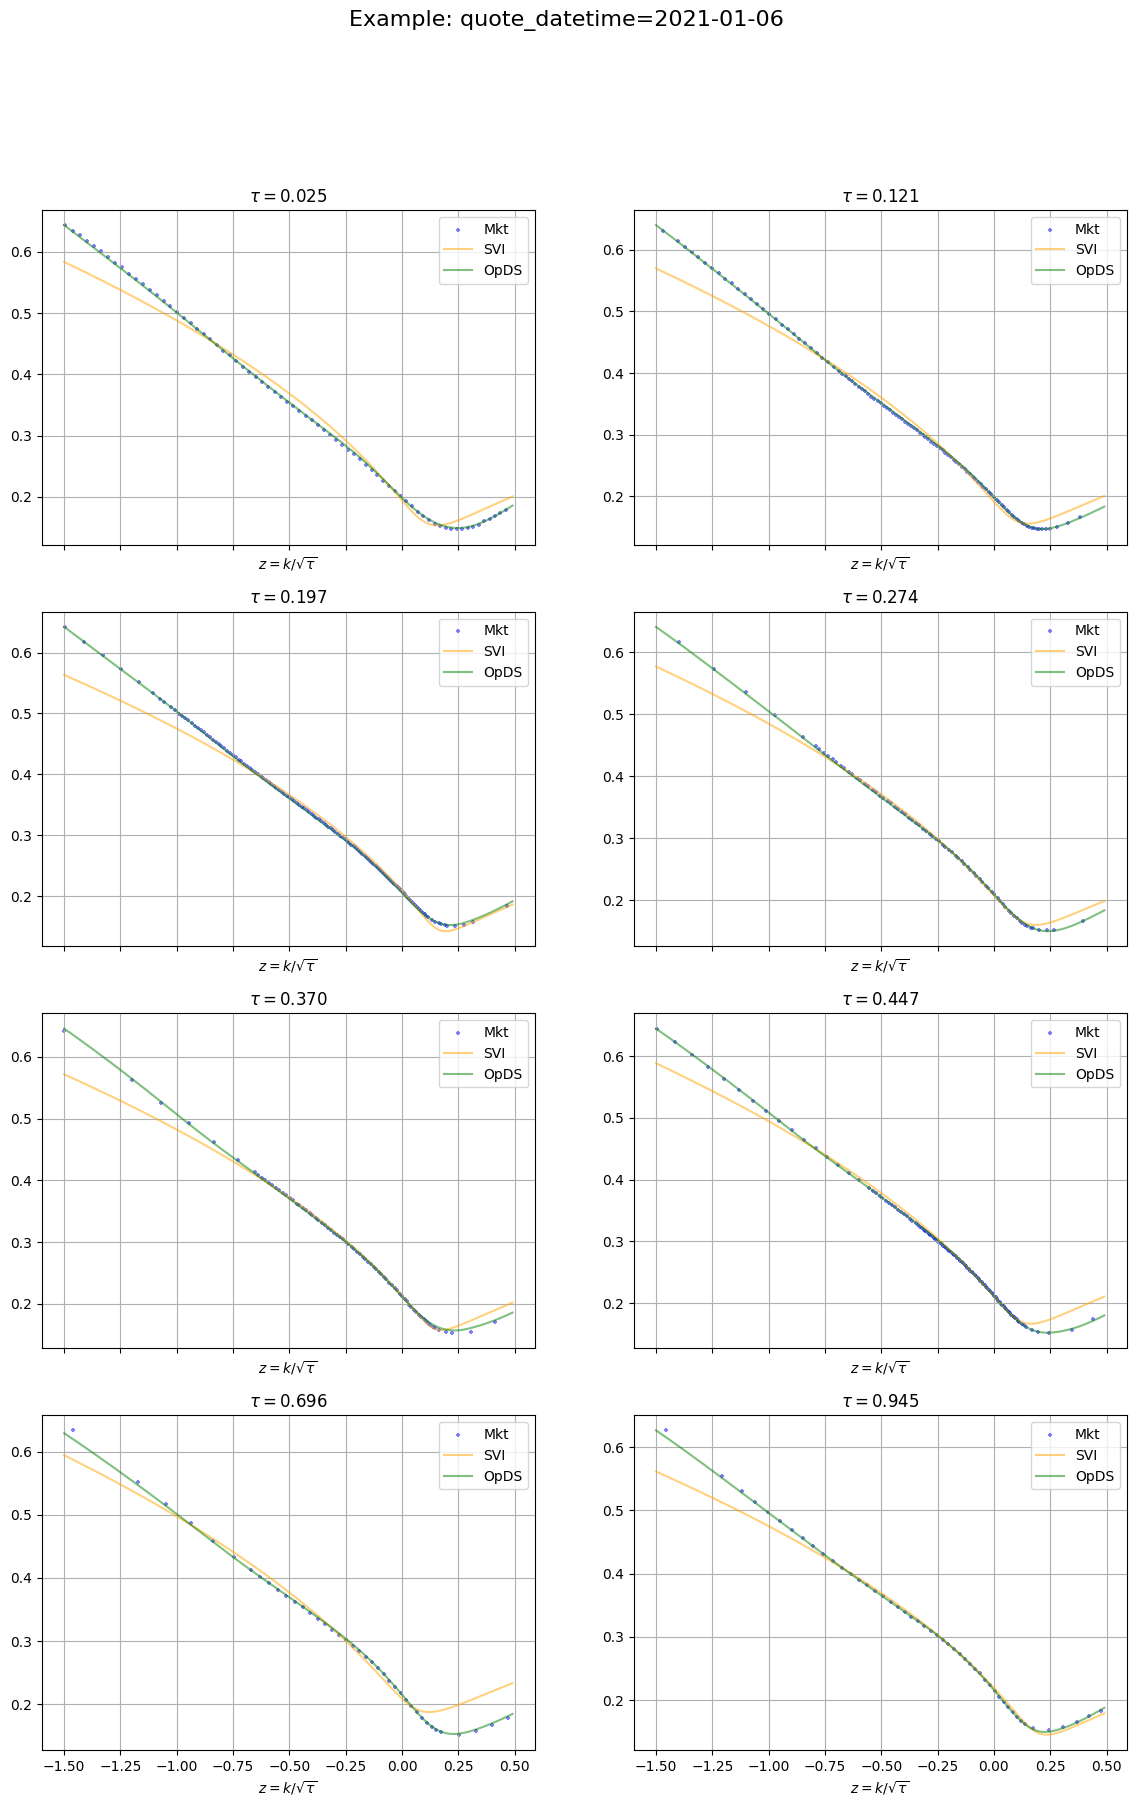

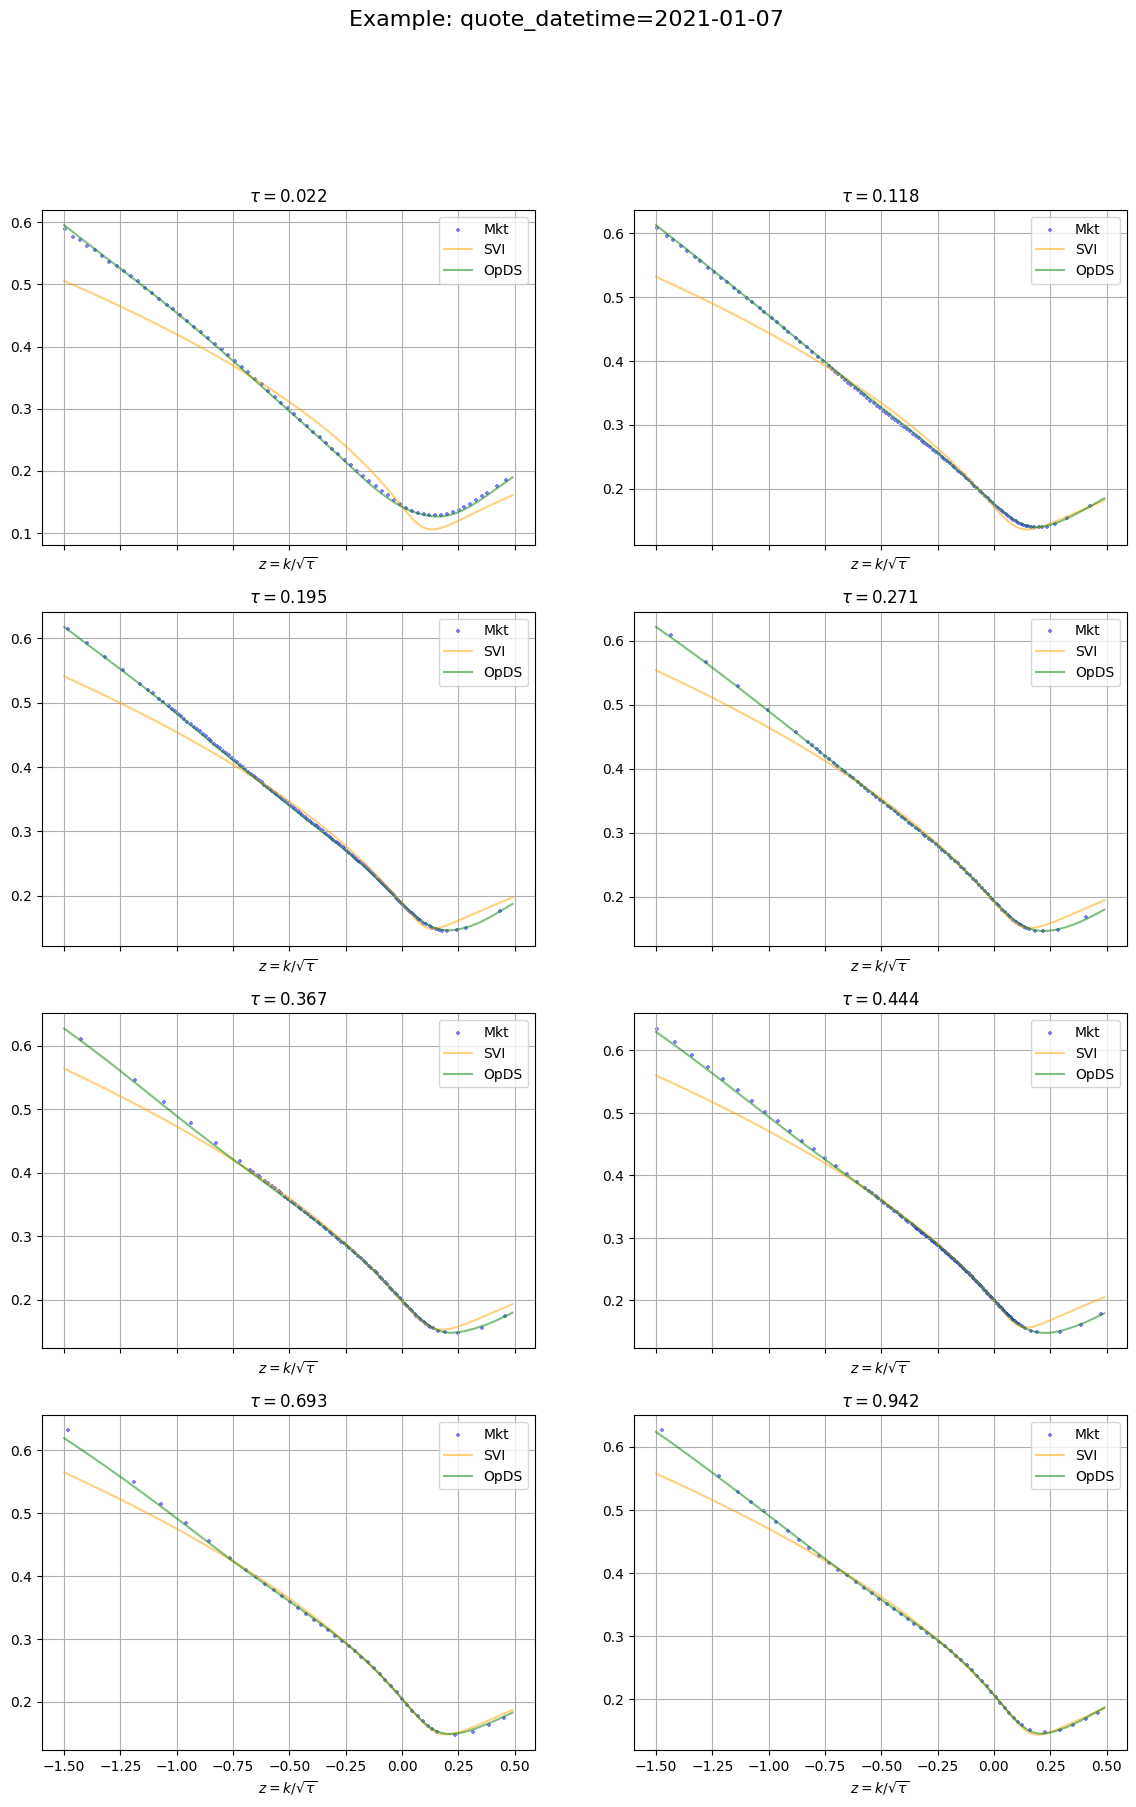

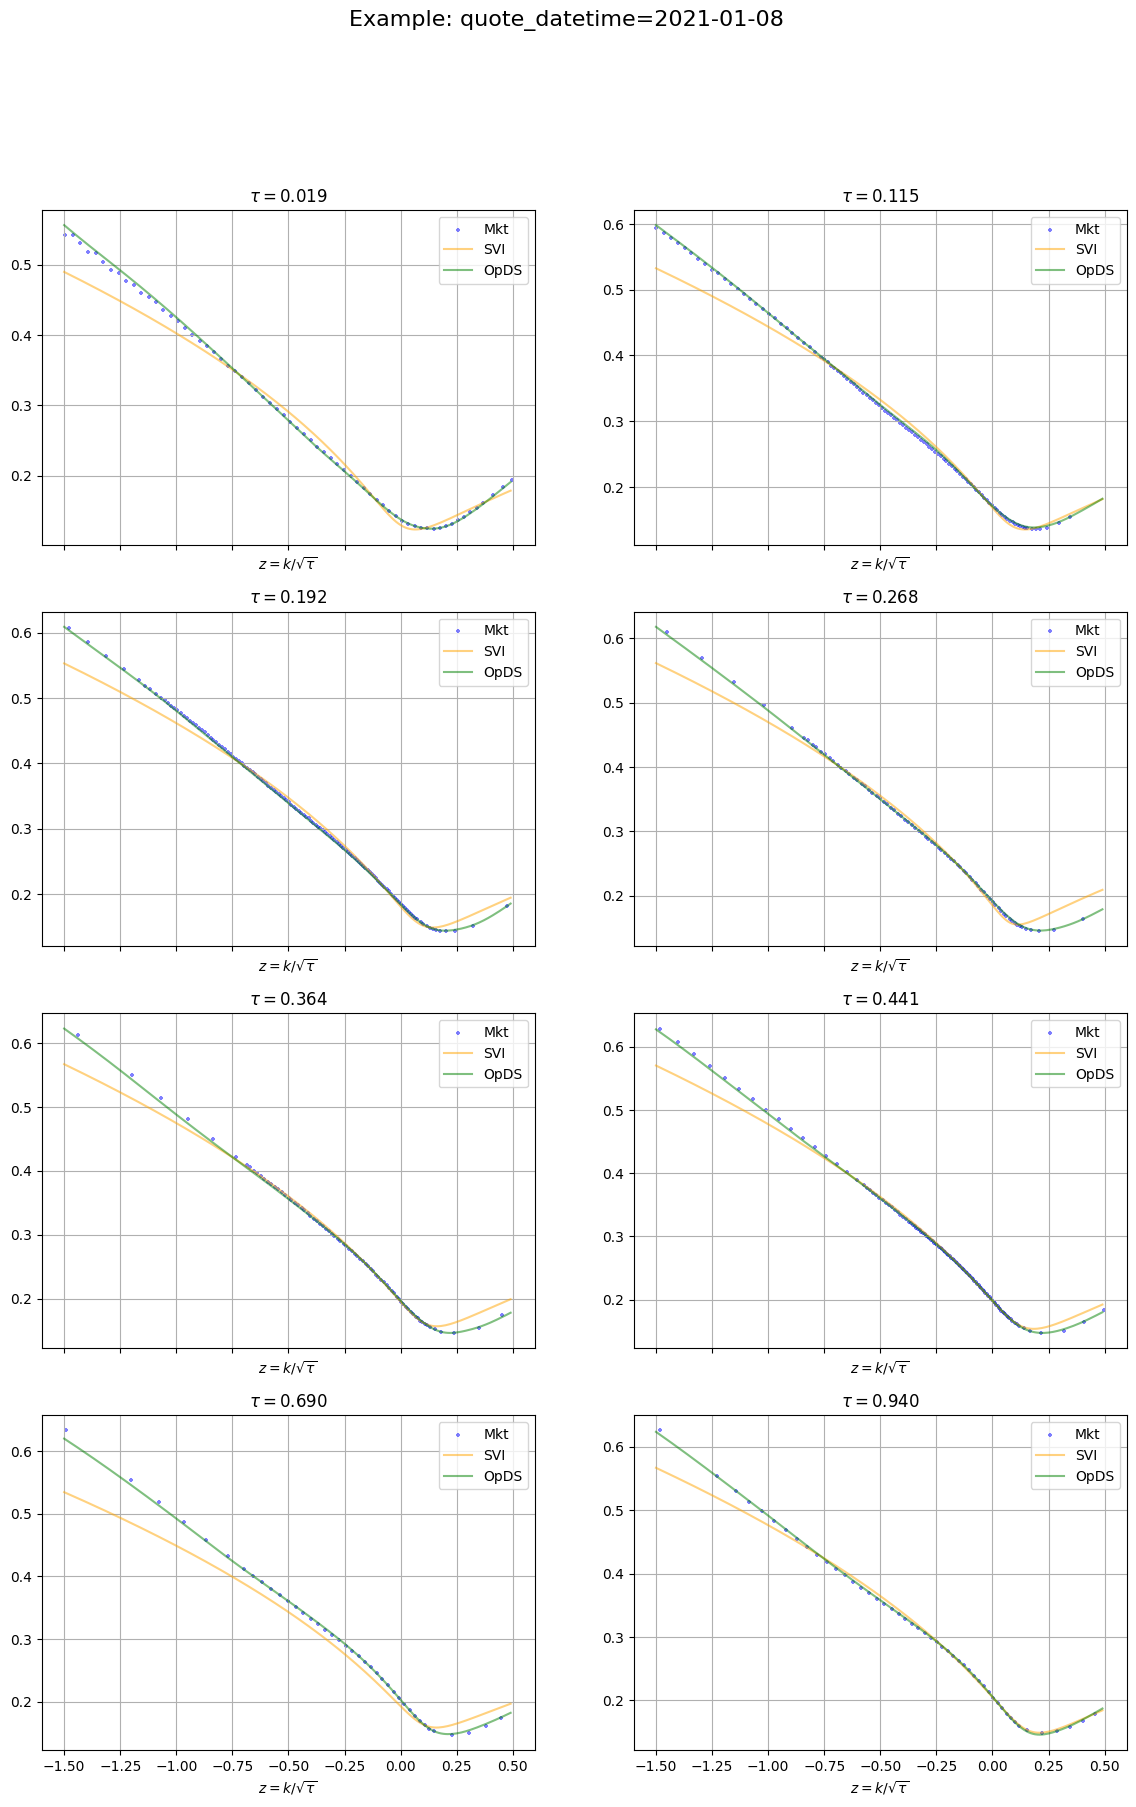

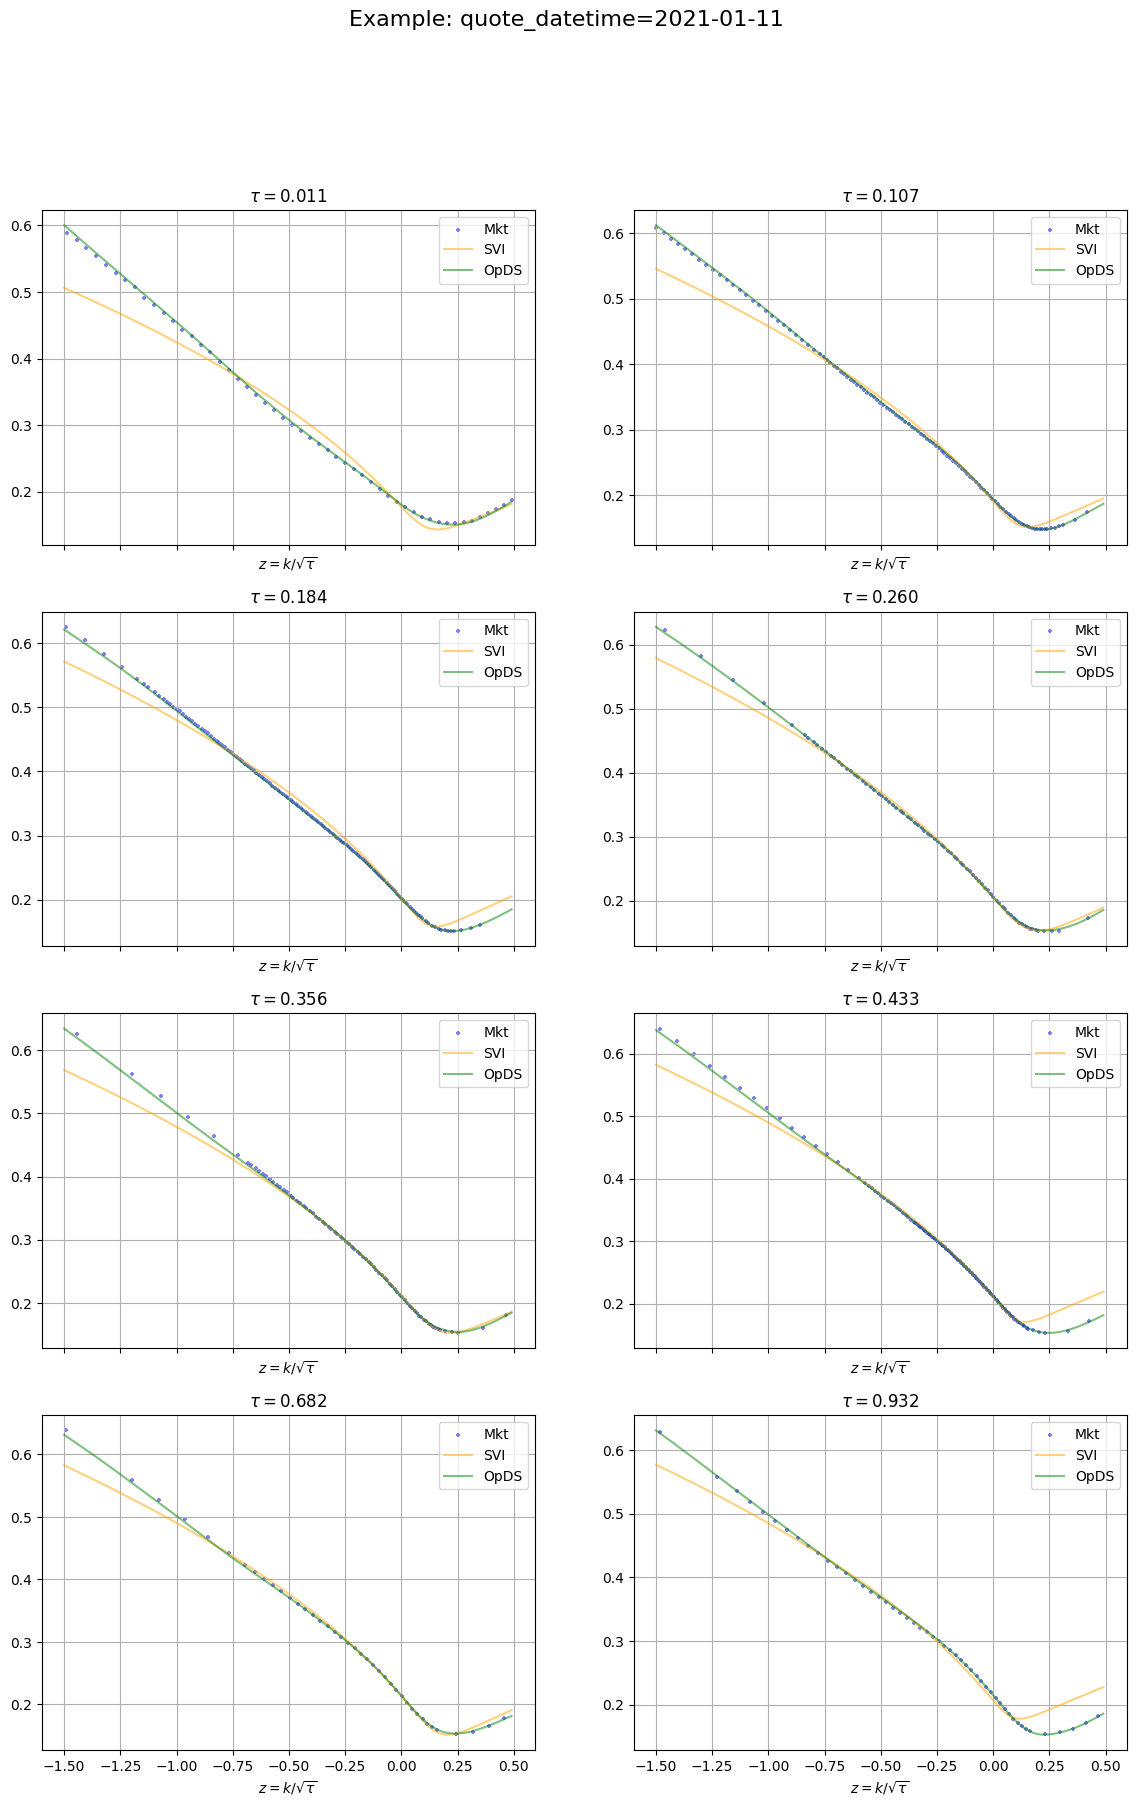

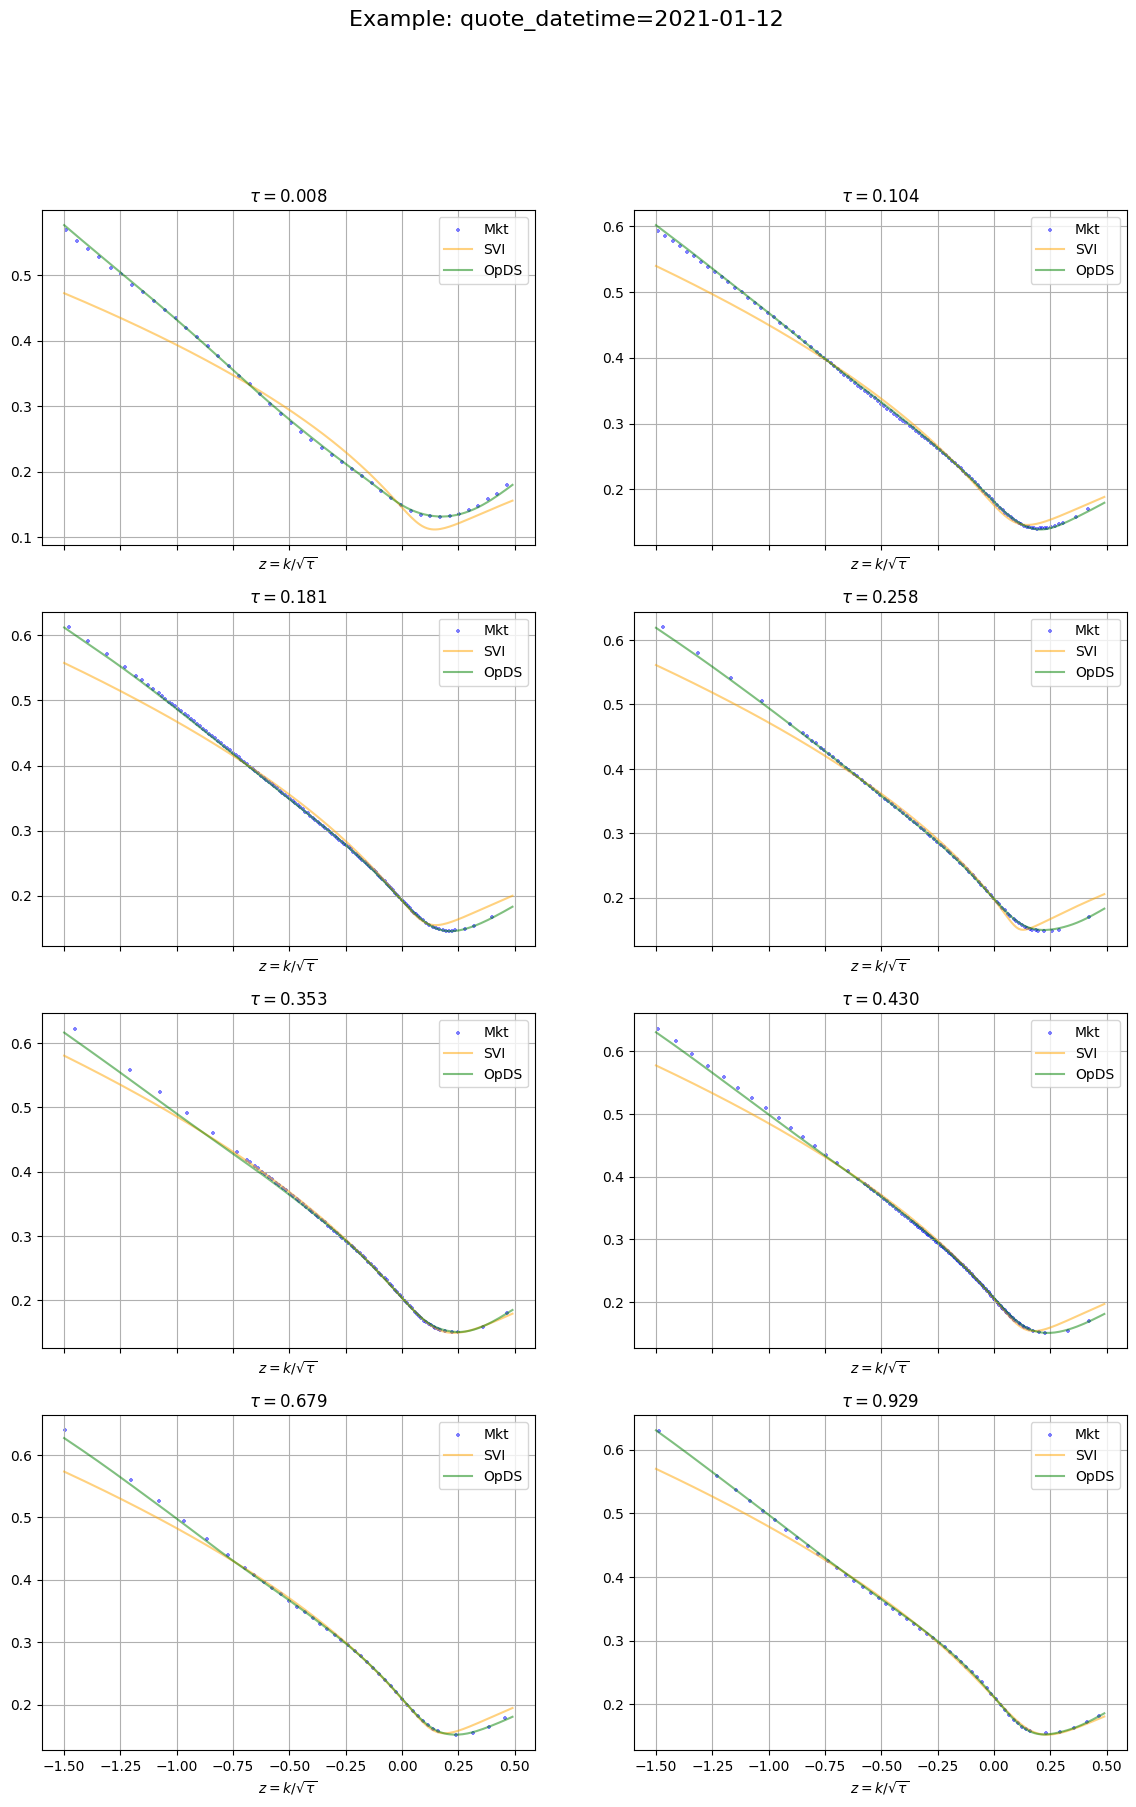

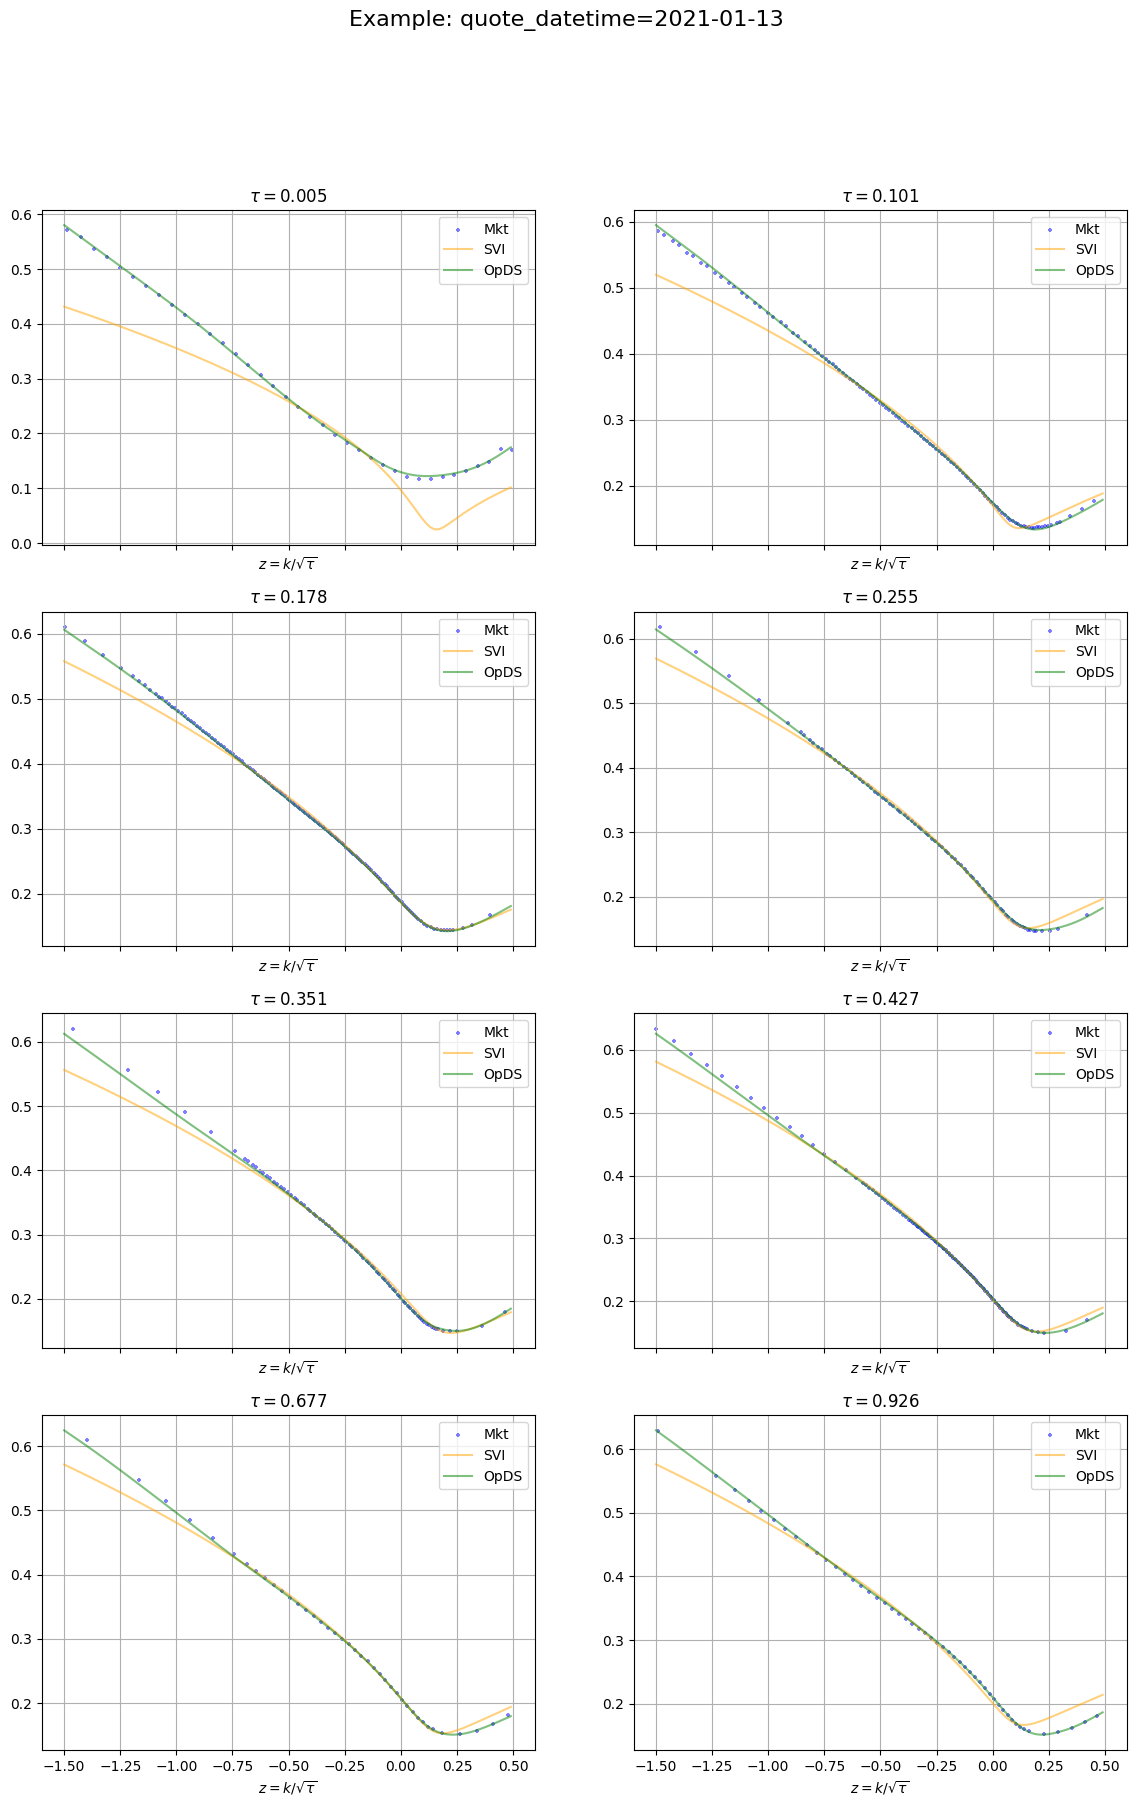

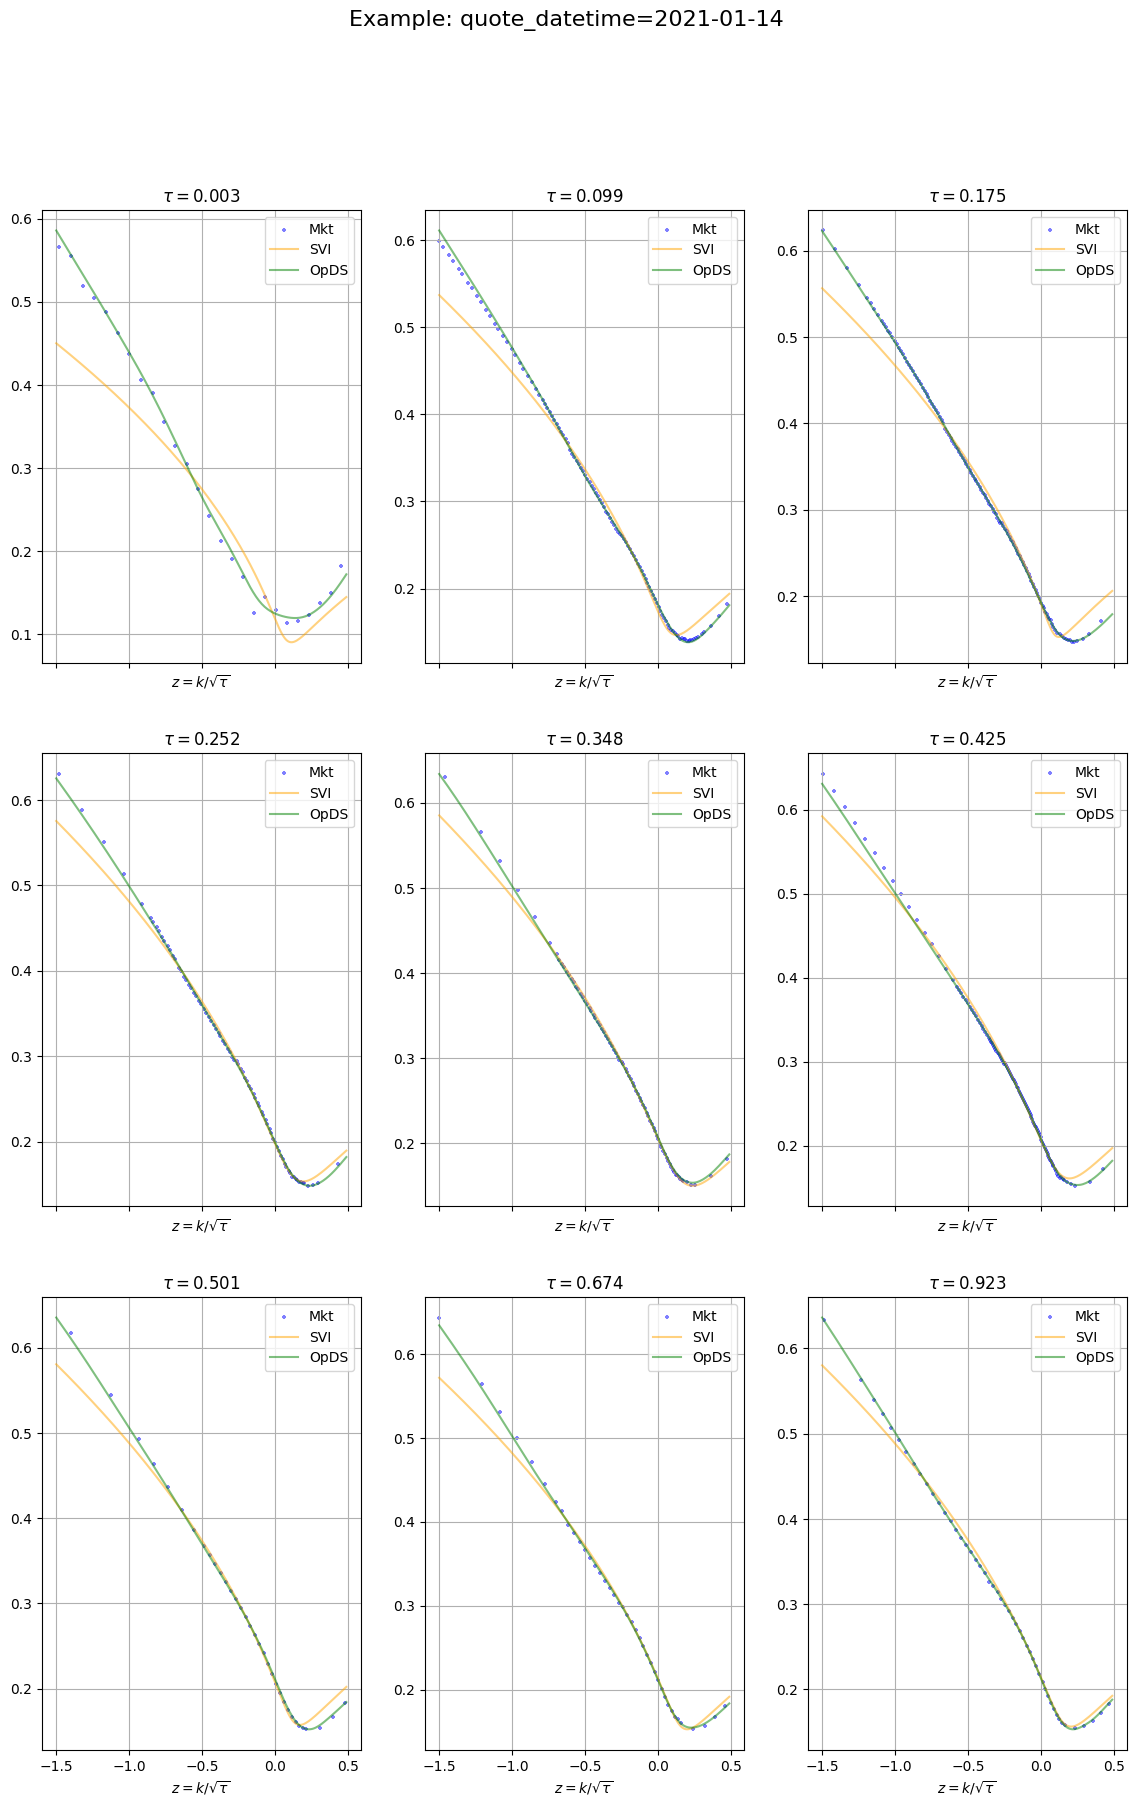

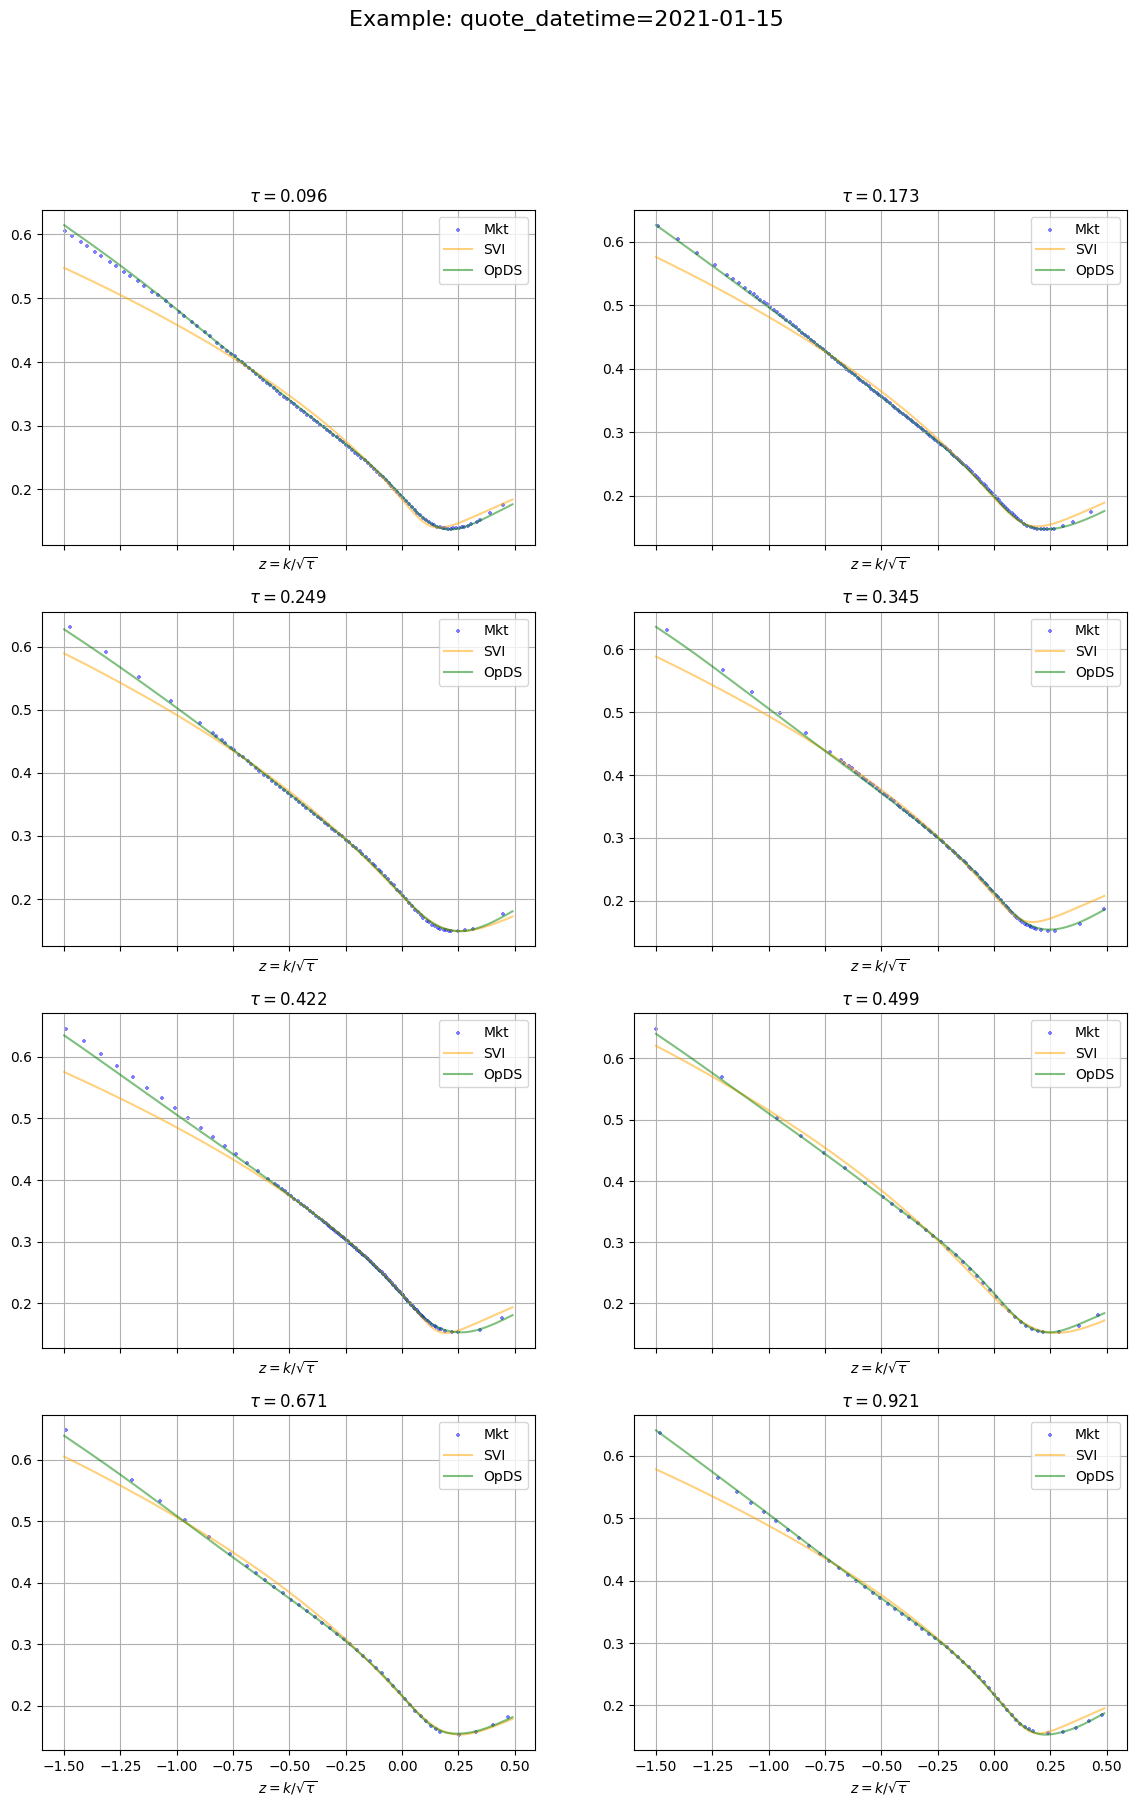

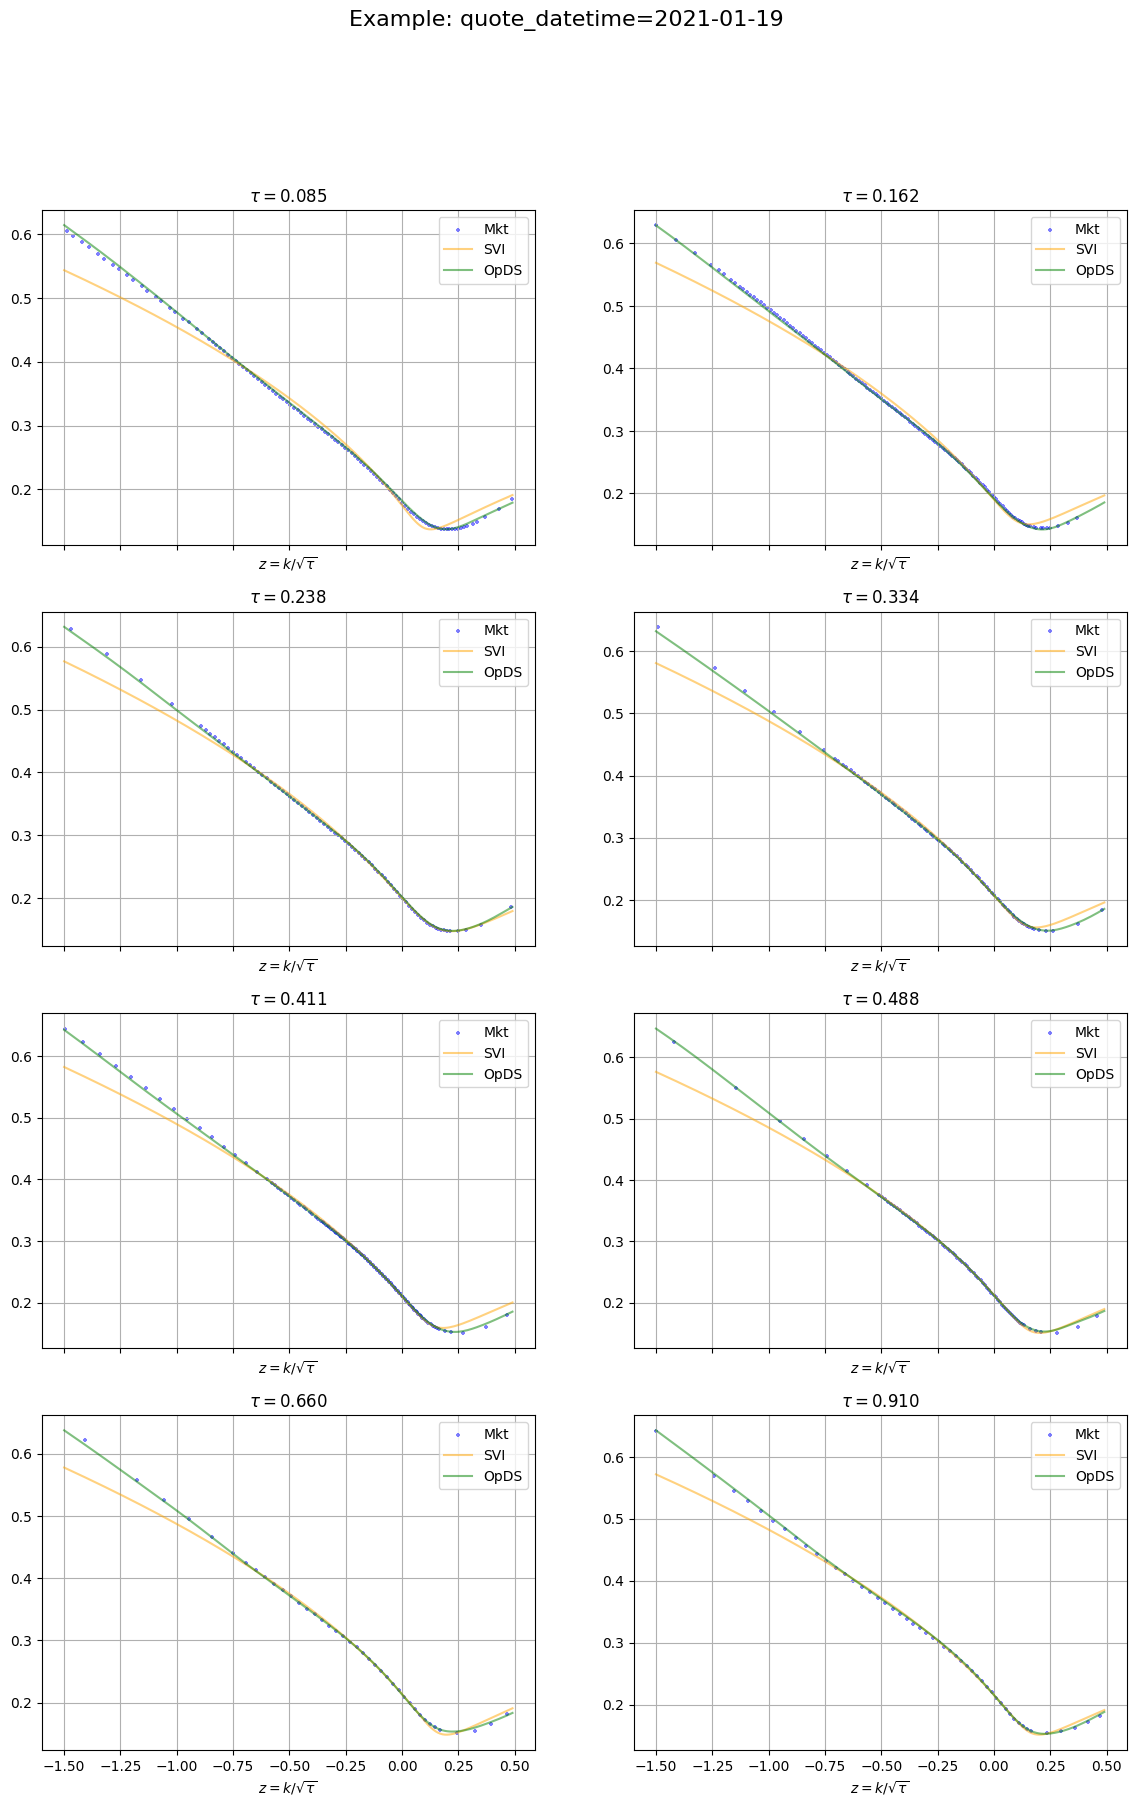

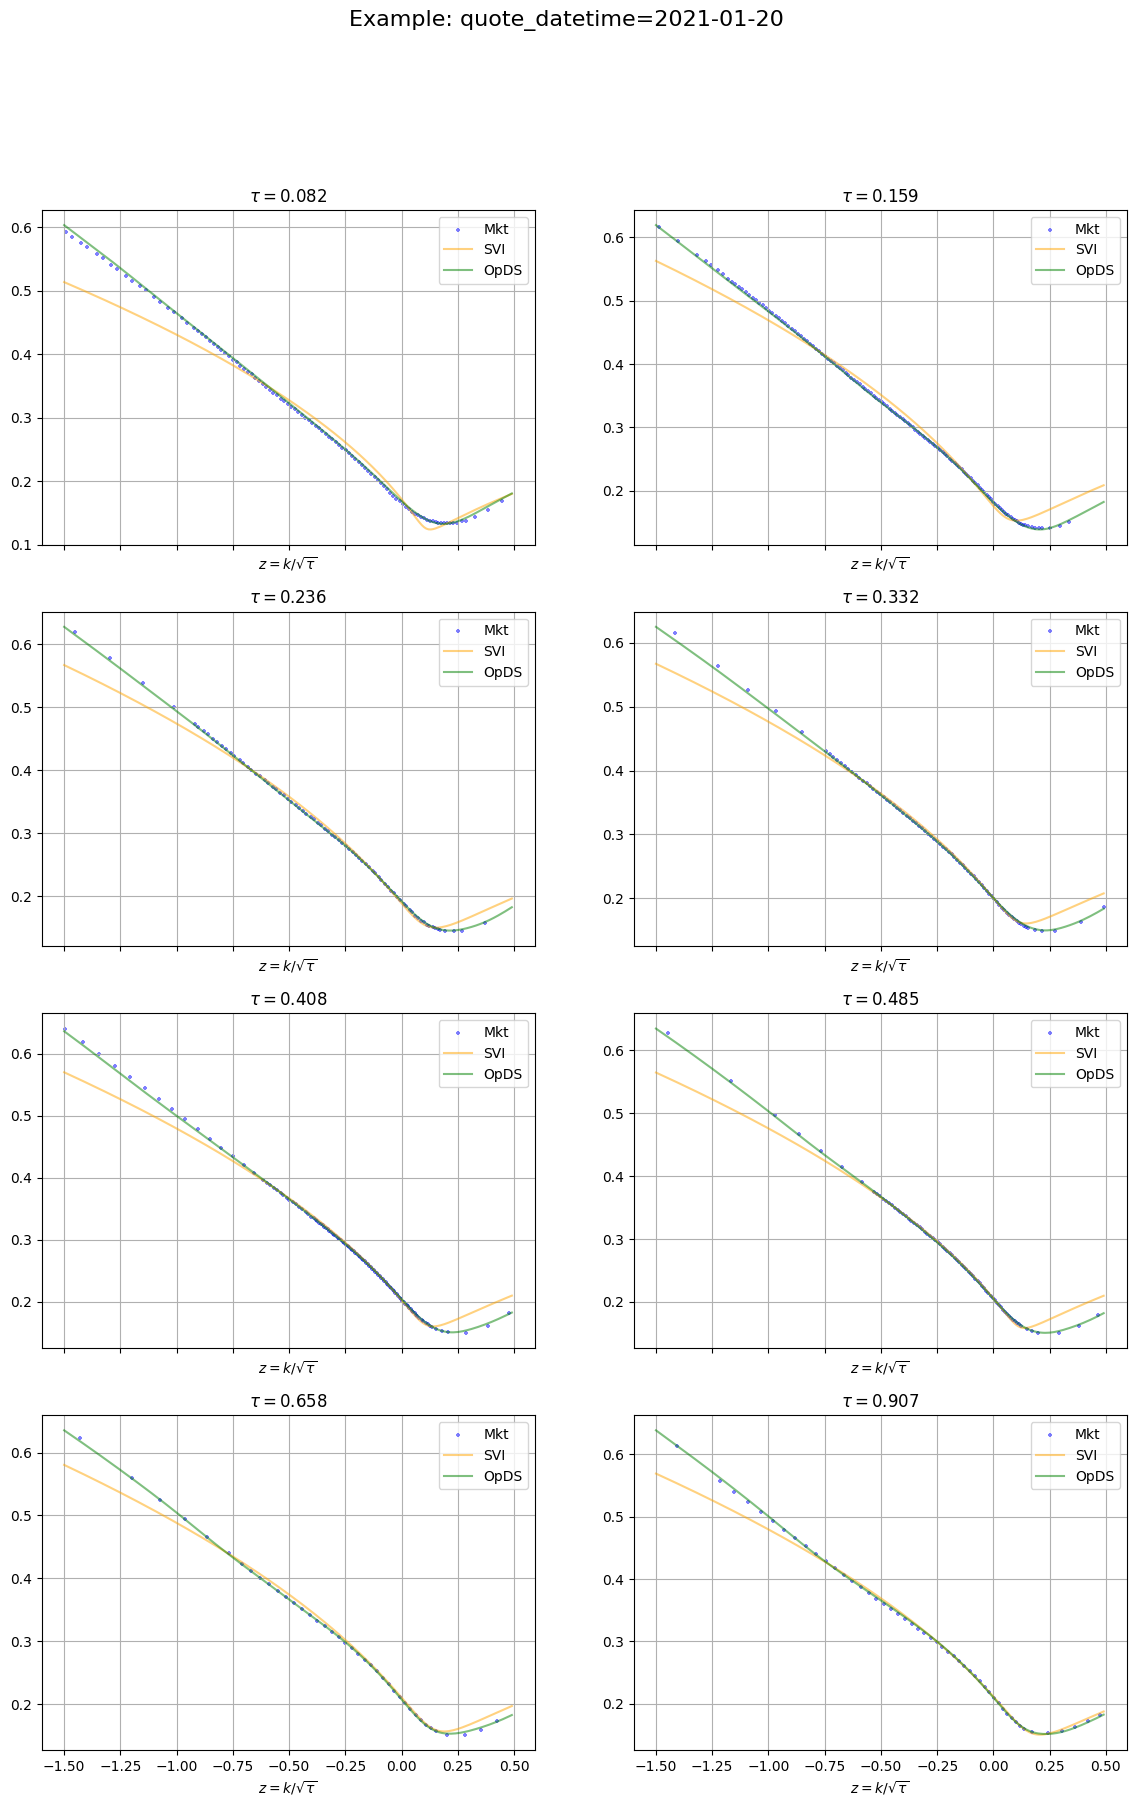

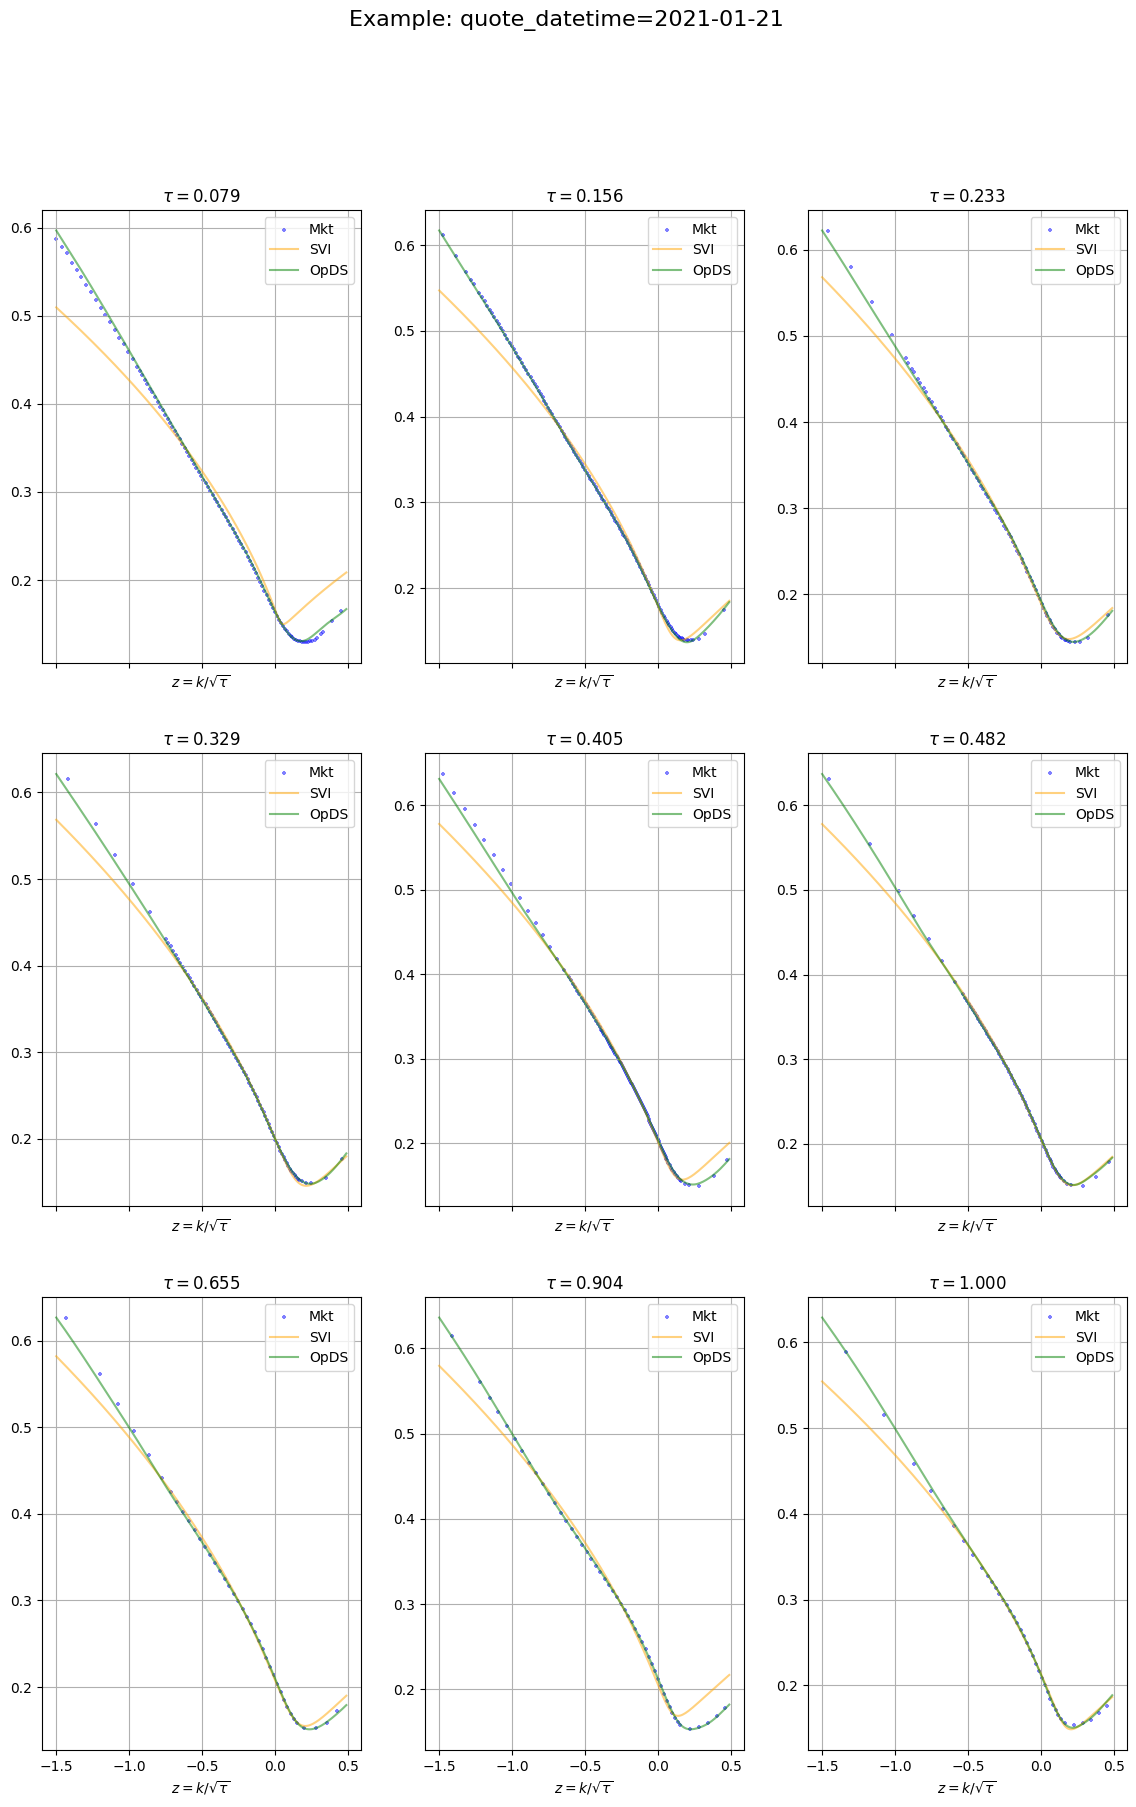

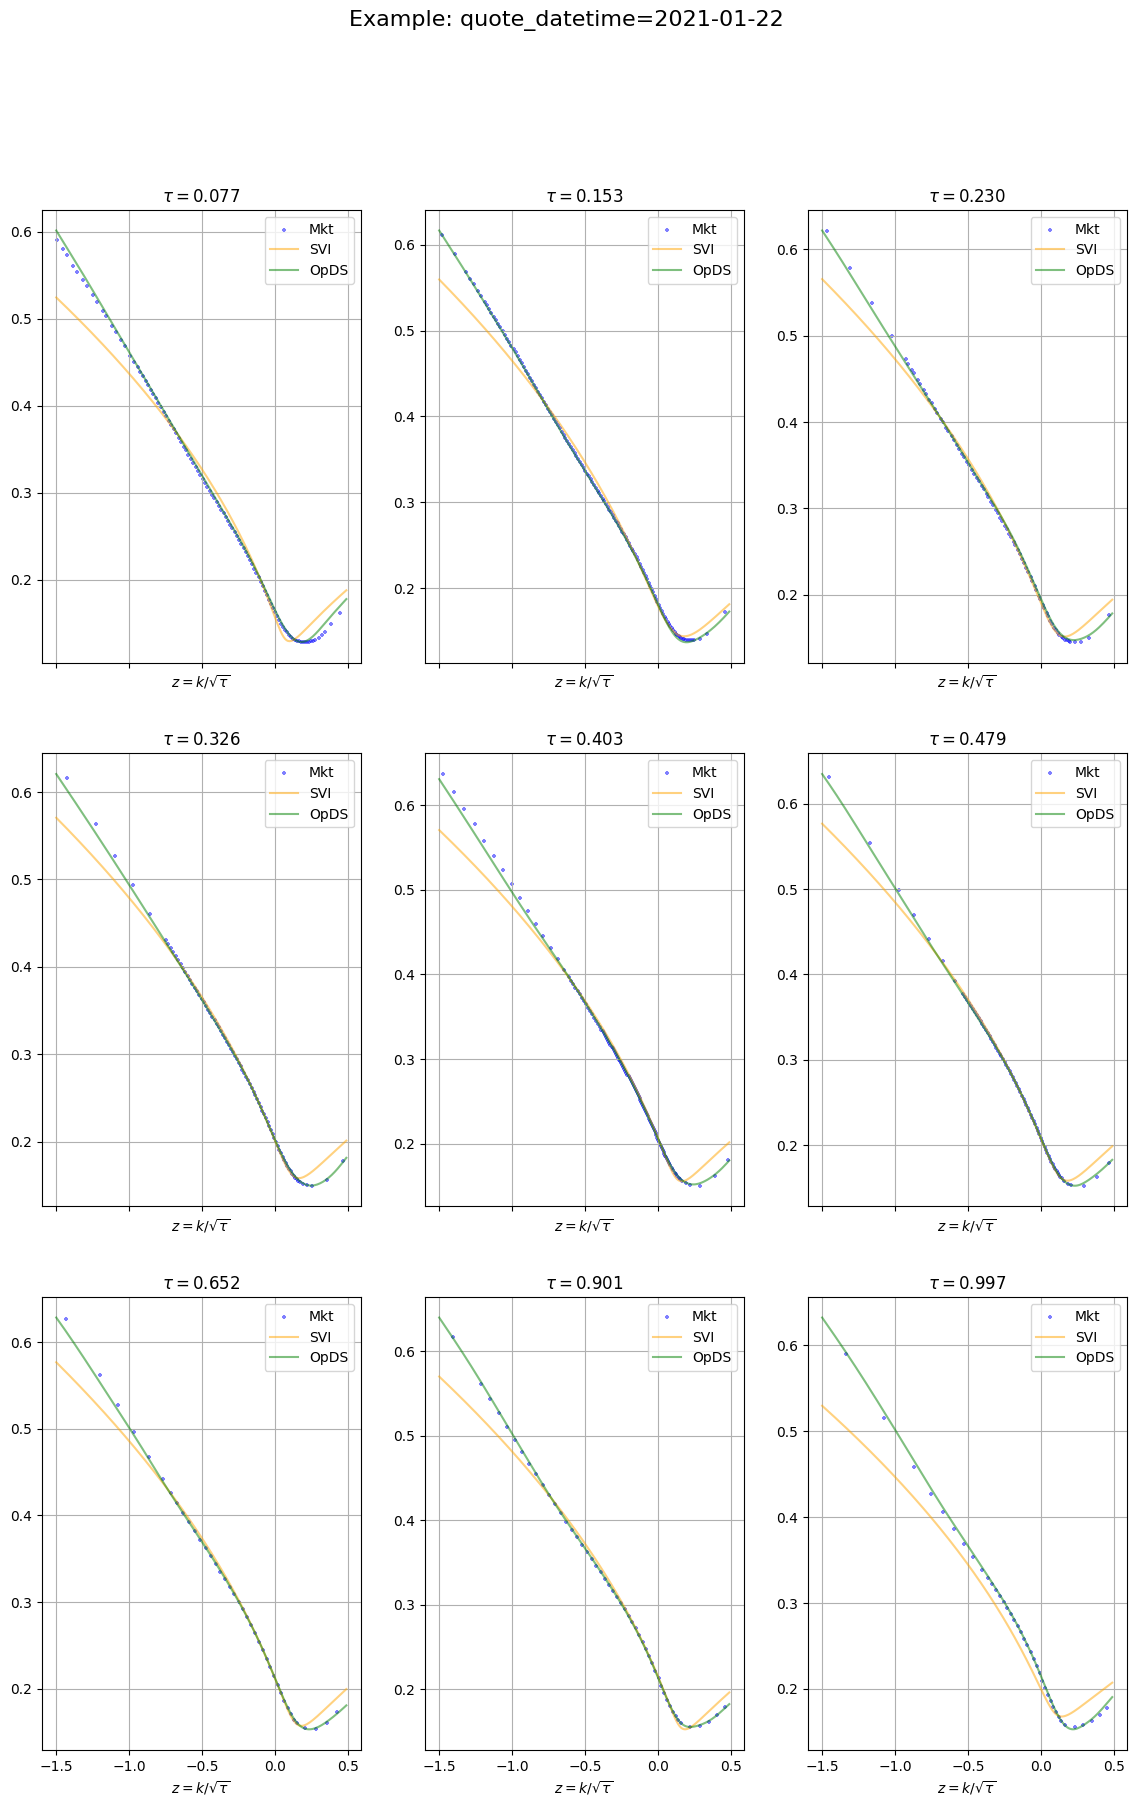

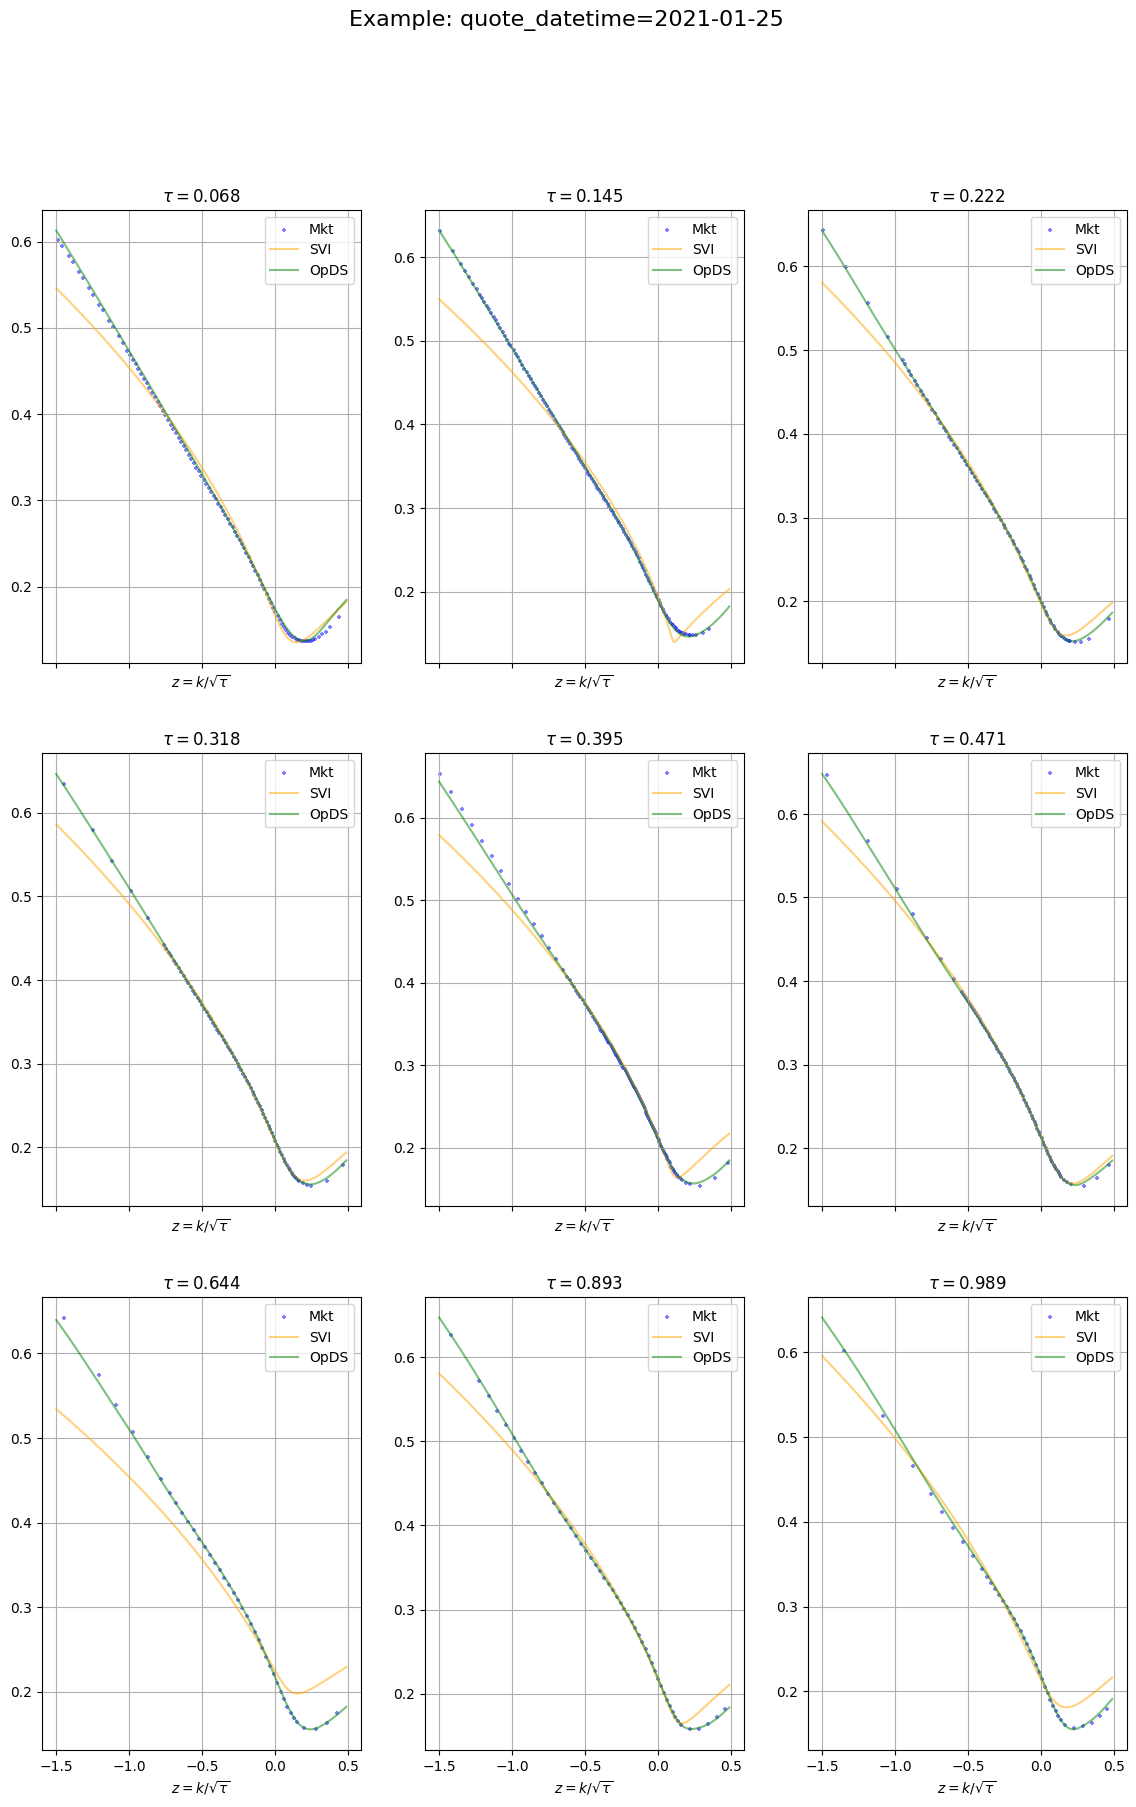

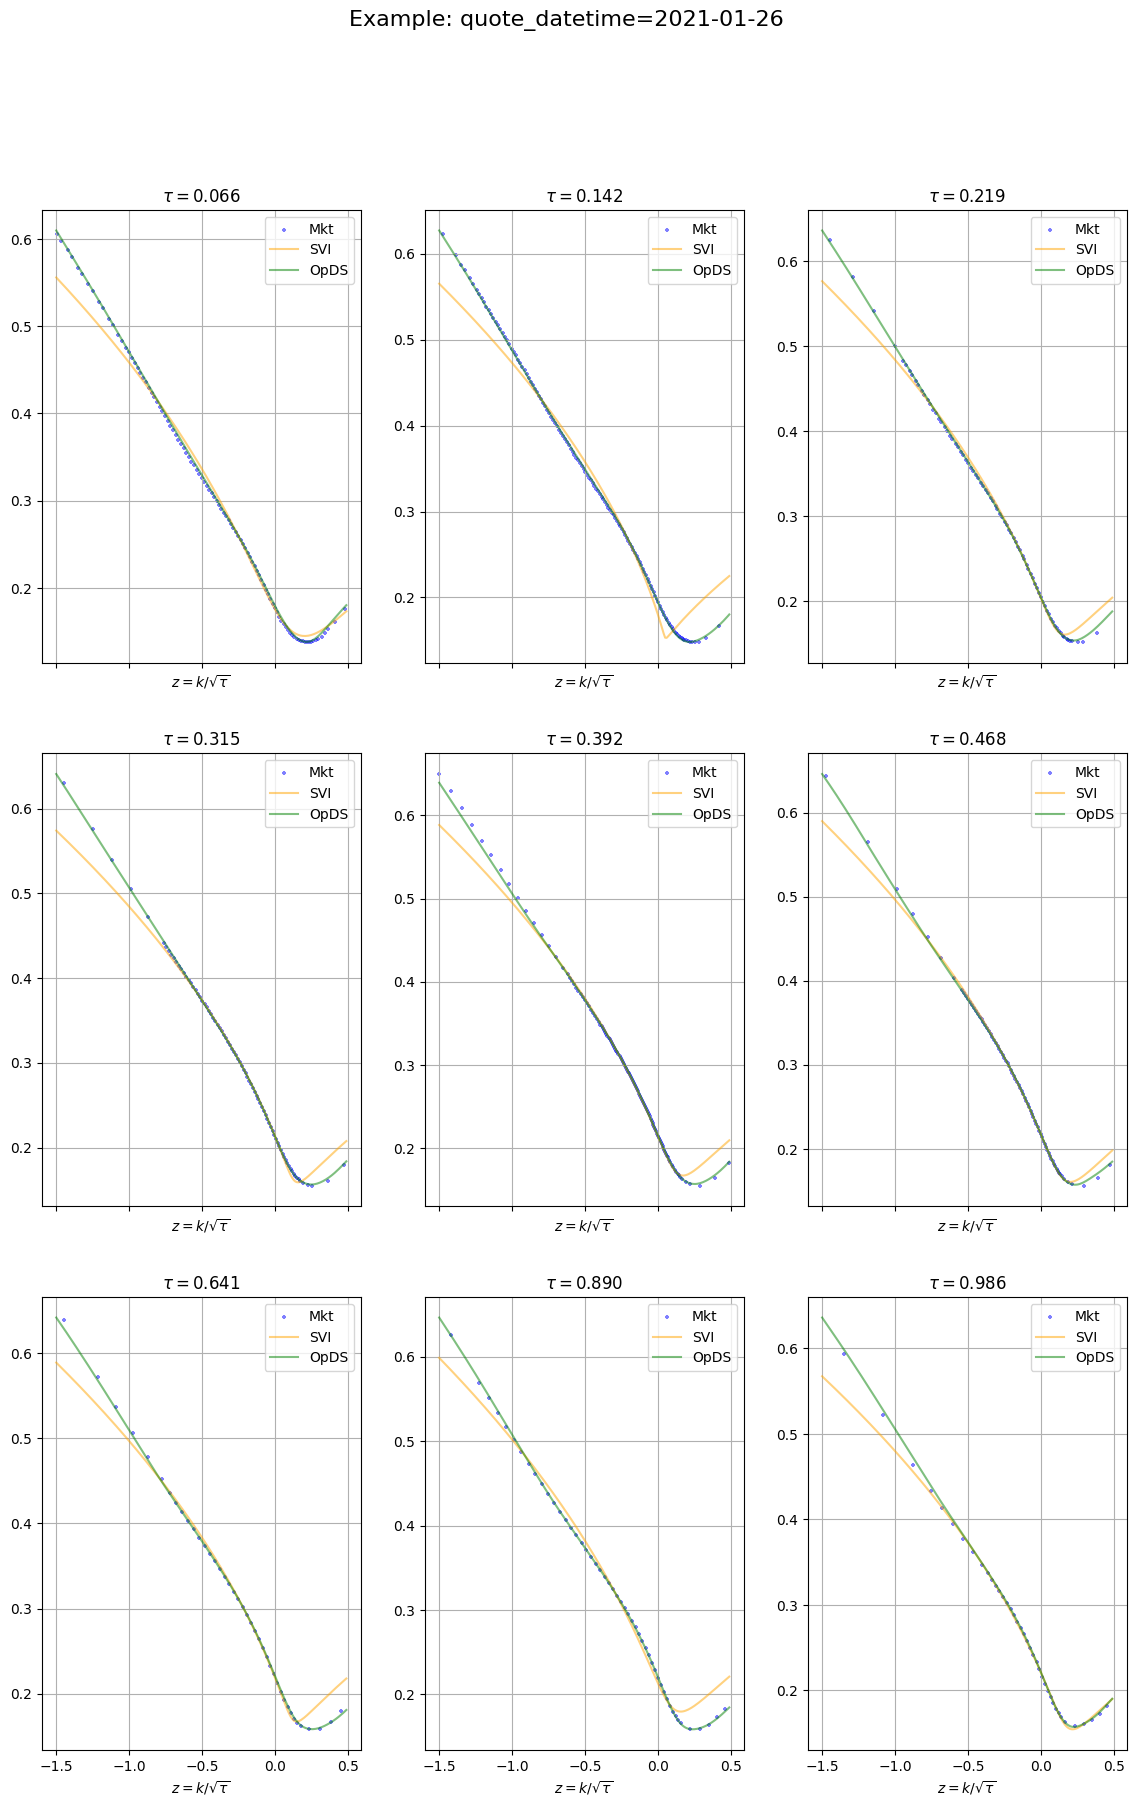

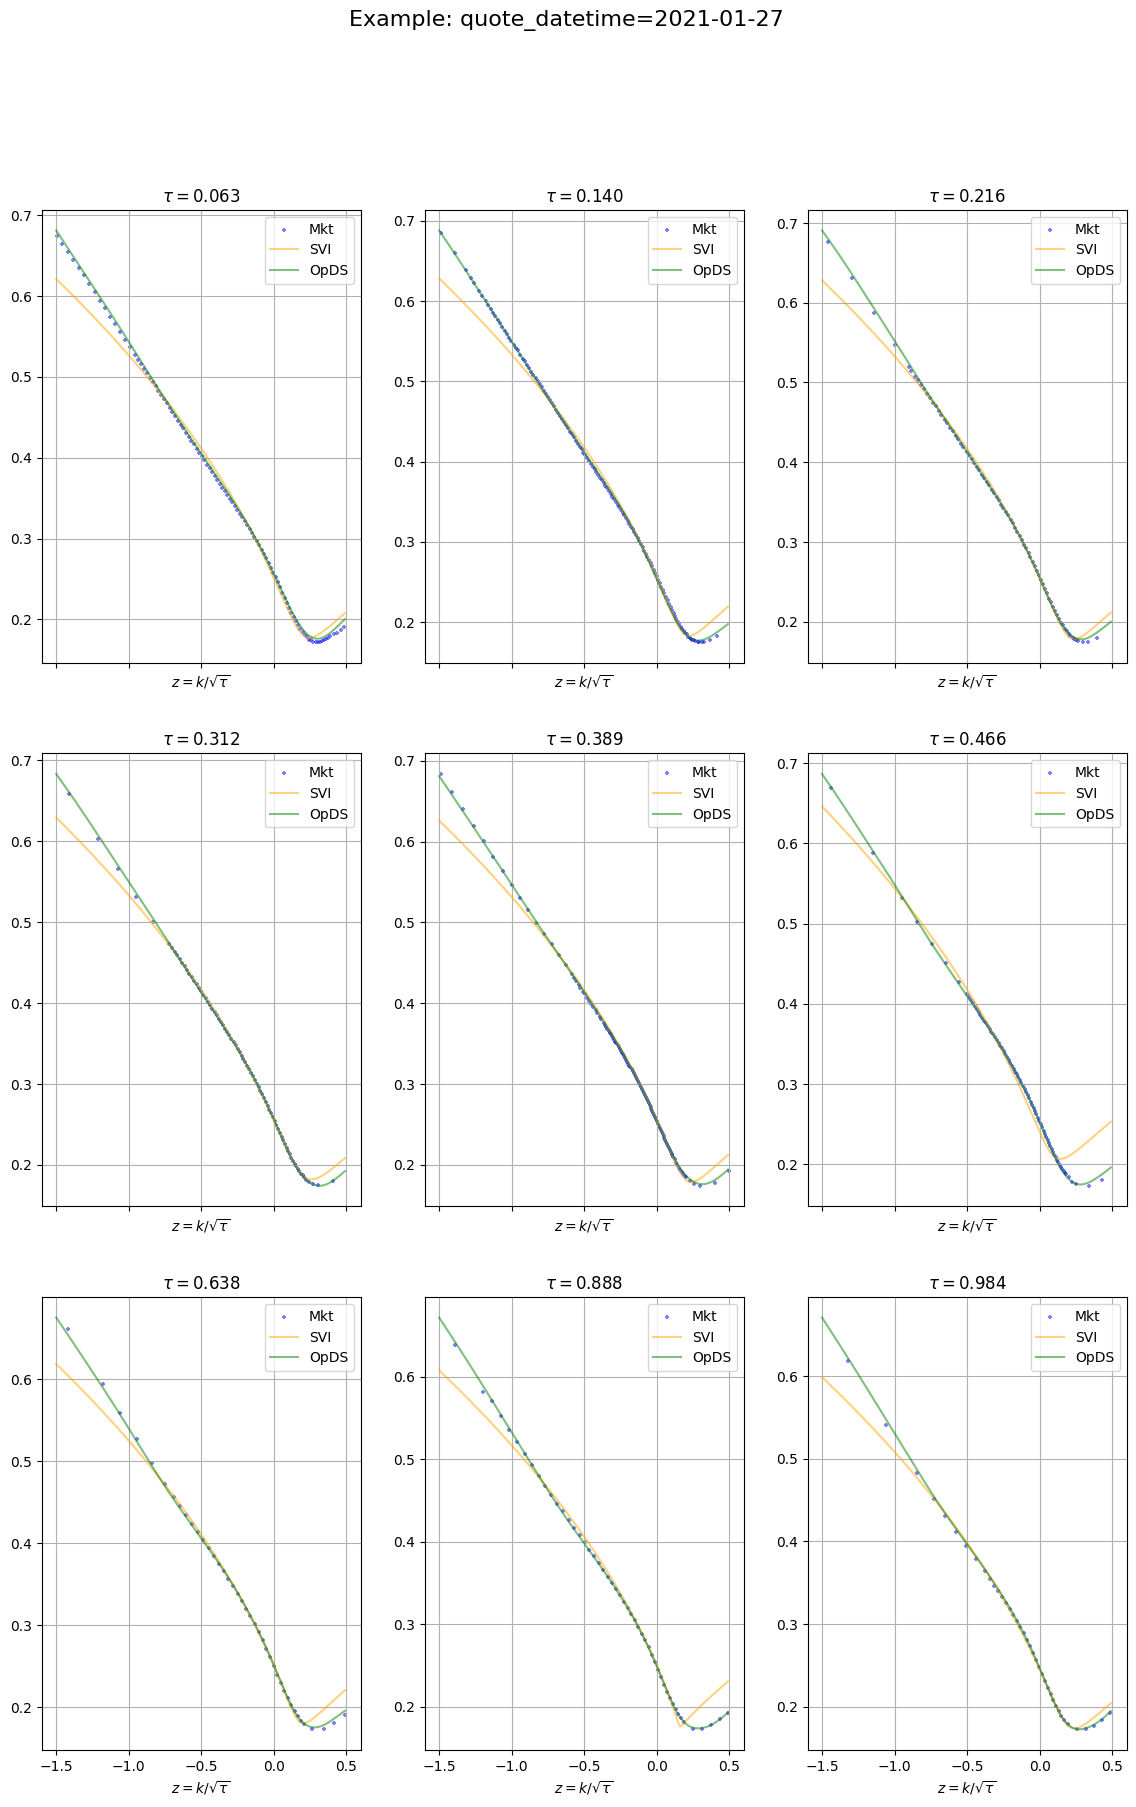

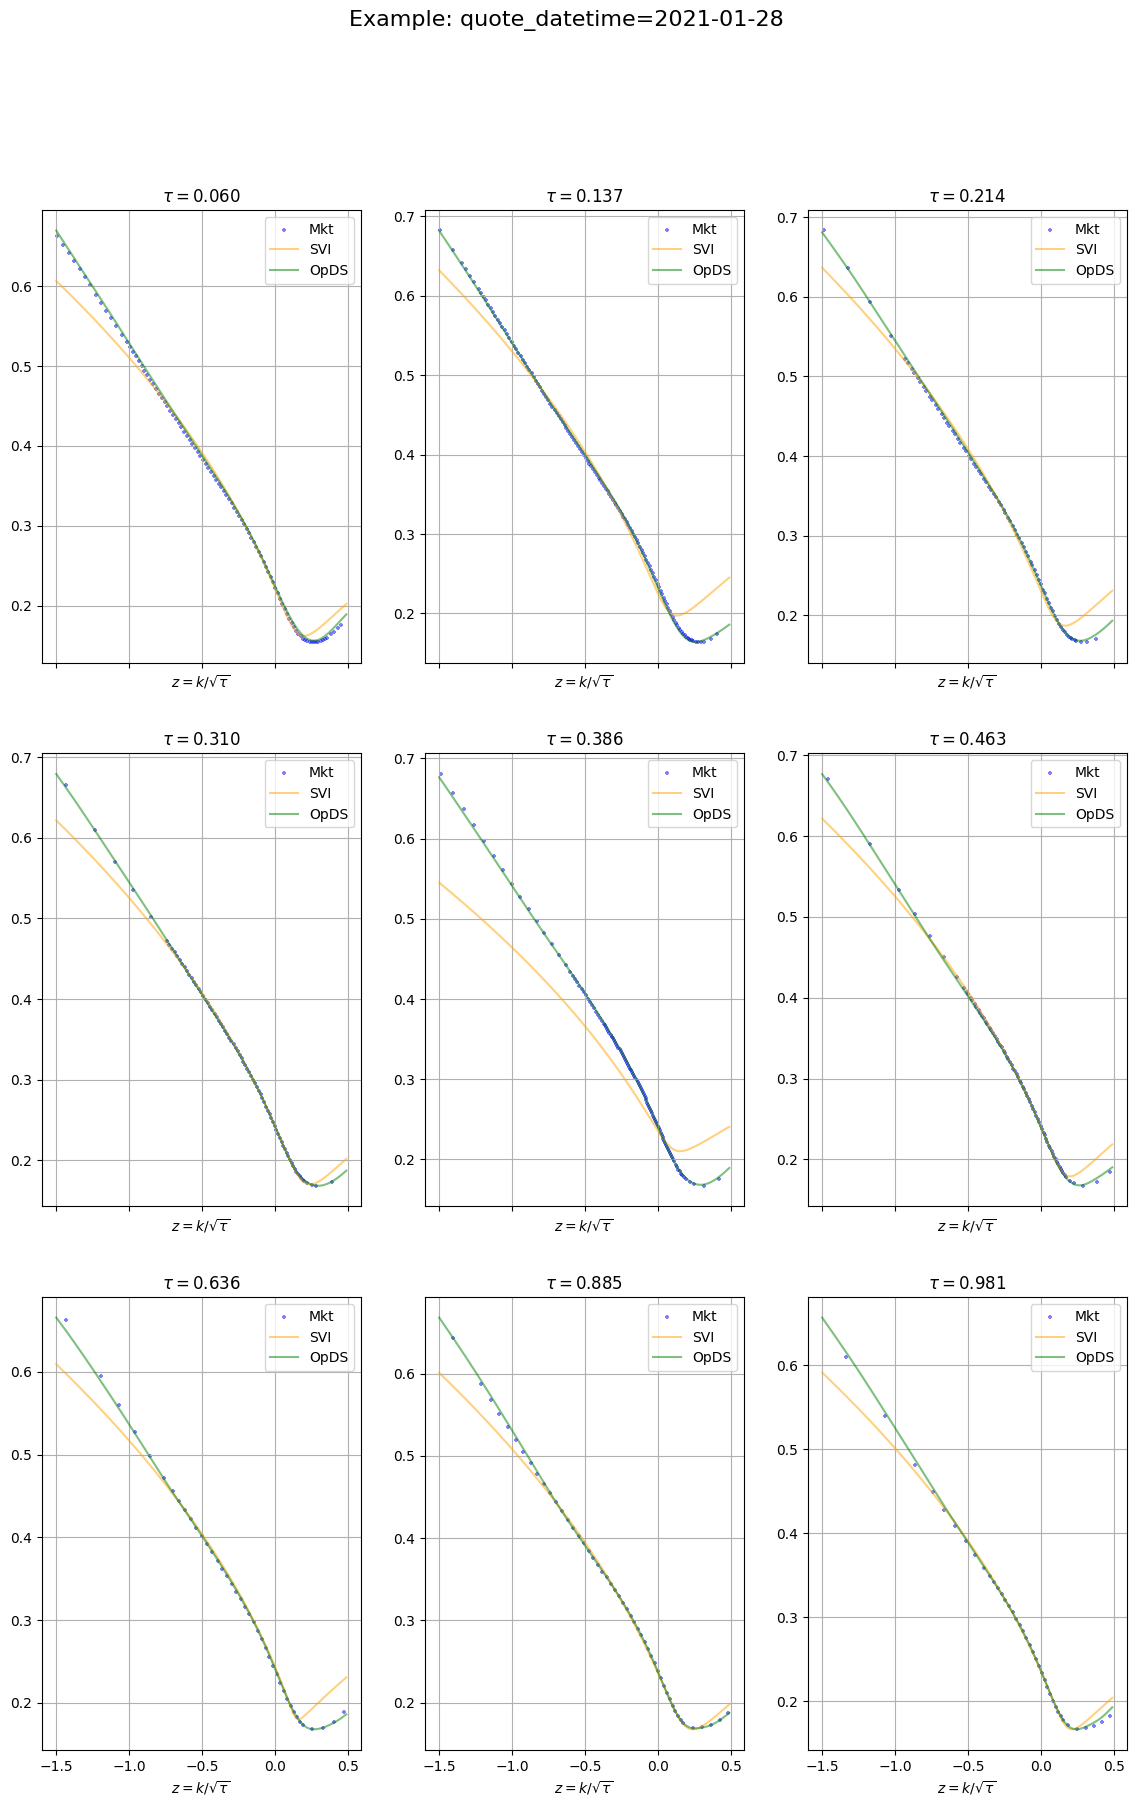

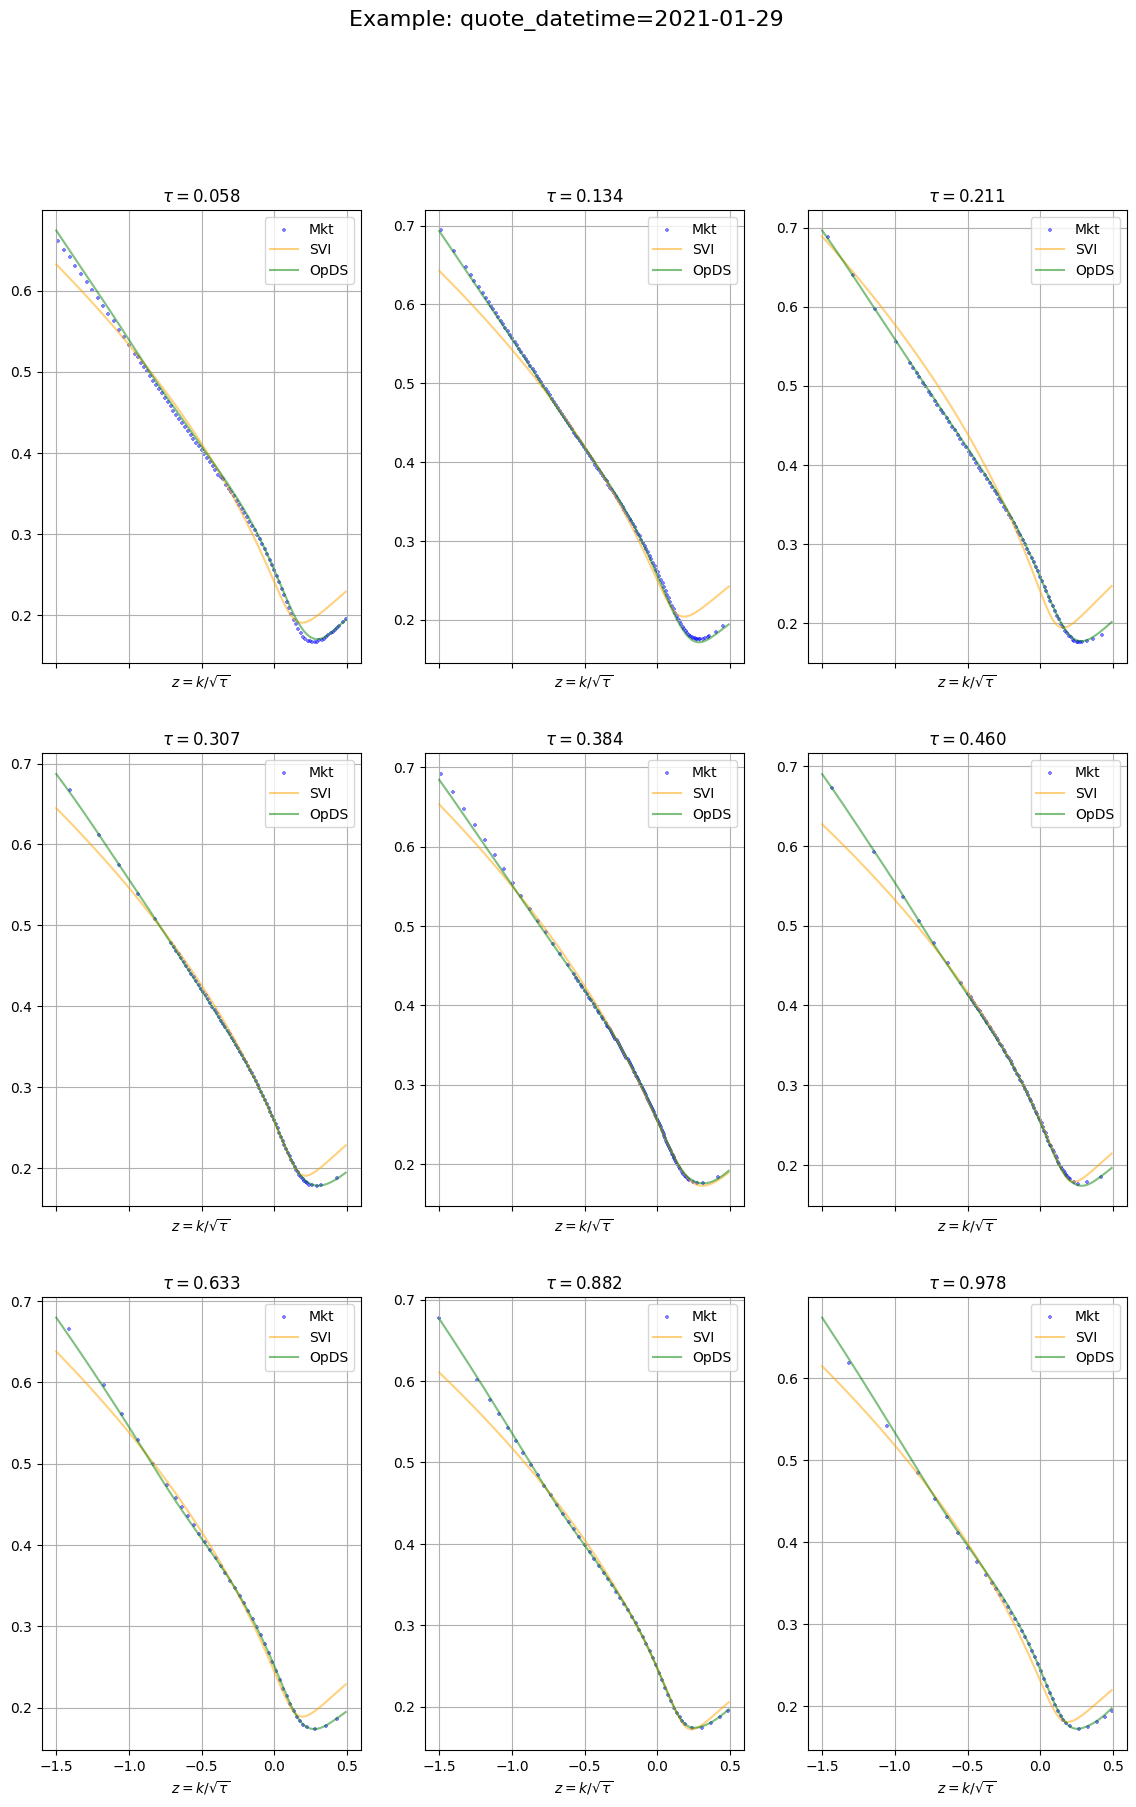

In [8]:
for data in spx_gno_dataset:
    fig, axs = loss.plot_example(gno, data, figsize=(14, 20));
    fig.suptitle(f'Example: quote_datetime={data["quote_datetime"].date()}', fontsize=16)
    plt.show()